<a href="https://colab.research.google.com/github/surajjorwar/FitnessTracker/blob/main/Remove_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import scipy
from sklearn.neighbors import LocalOutlierFactor


# Load data

In [3]:
df = pd.read_pickle('/content/drive/MyDrive/FitnessTracker/FitnessTracker/data-science-template-main/data/interim/01_data_processed.pkl')

In [4]:
df.head(2)

acc_x   acc_y   acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                
2019-01-11 15:08:05.200  0.0135  0.9770 -0.0710 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.0015  0.9705 -0.0795 -1.6826 -0.8904  2.1708   

                        participant  label category  set  
epoch (ms)                                                
2019-01-11 15:08:05.200           B  bench    heavy   71  
2019-01-11 15:08:05.400           B  bench    heavy   71

In [5]:
outliers_columns  = list(df.columns[:6])
outliers_columns

['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']

# Plotting outliers

array([<Axes: title={'center': 'gyr_x'}, xlabel='[label]'>,
       <Axes: title={'center': 'gyr_y'}, xlabel='[label]'>,
       <Axes: title={'center': 'gyr_z'}, xlabel='[label]'>], dtype=object)

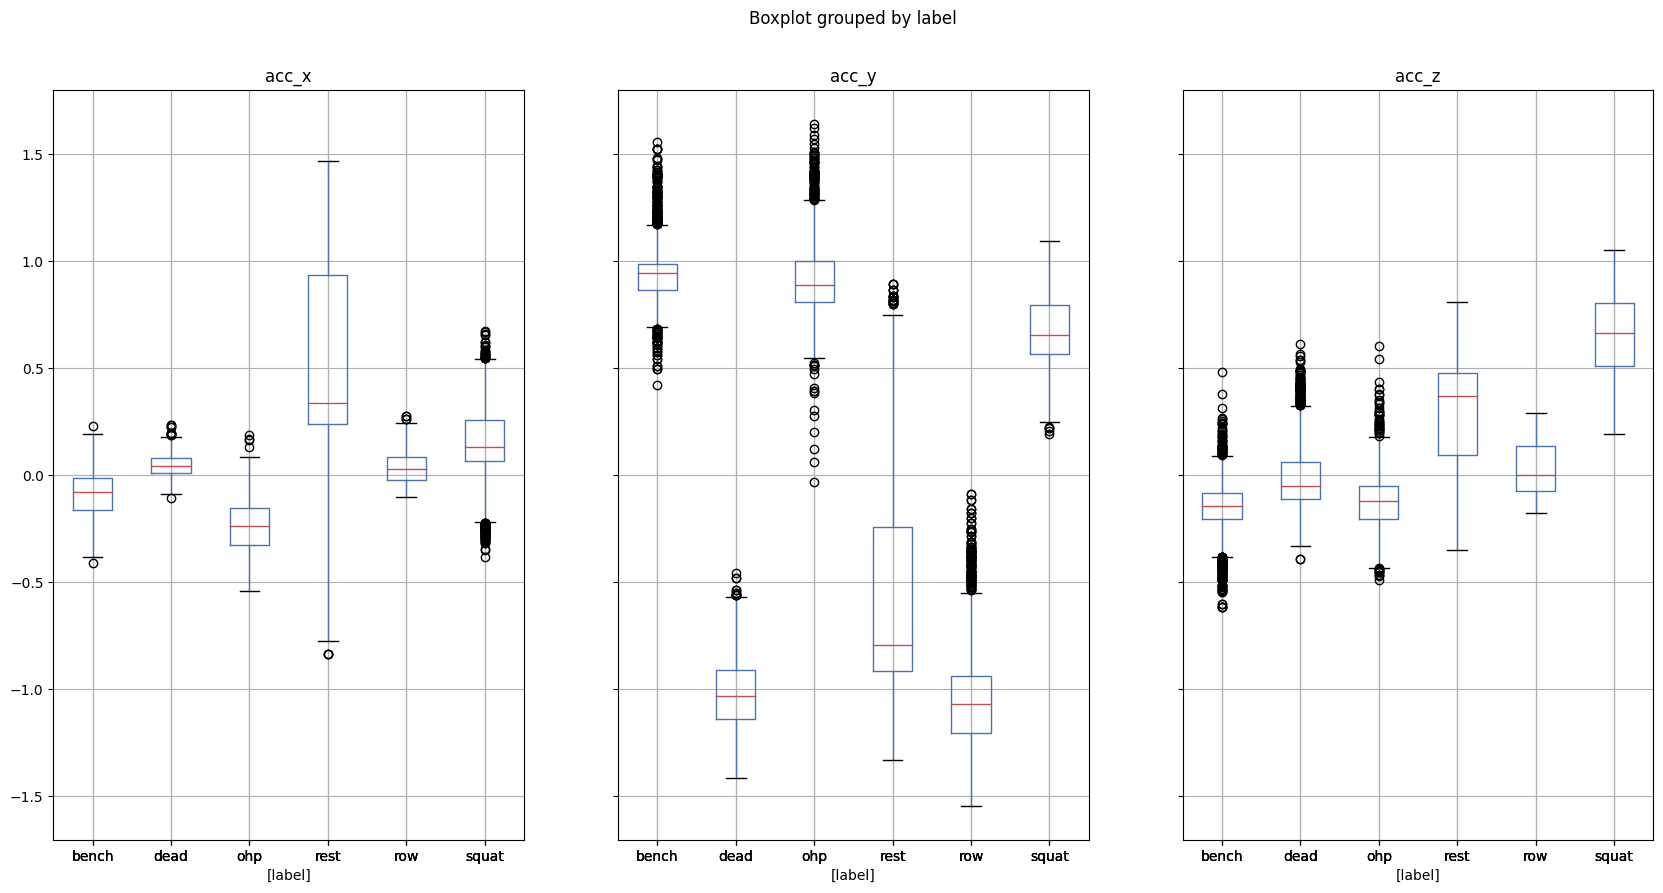

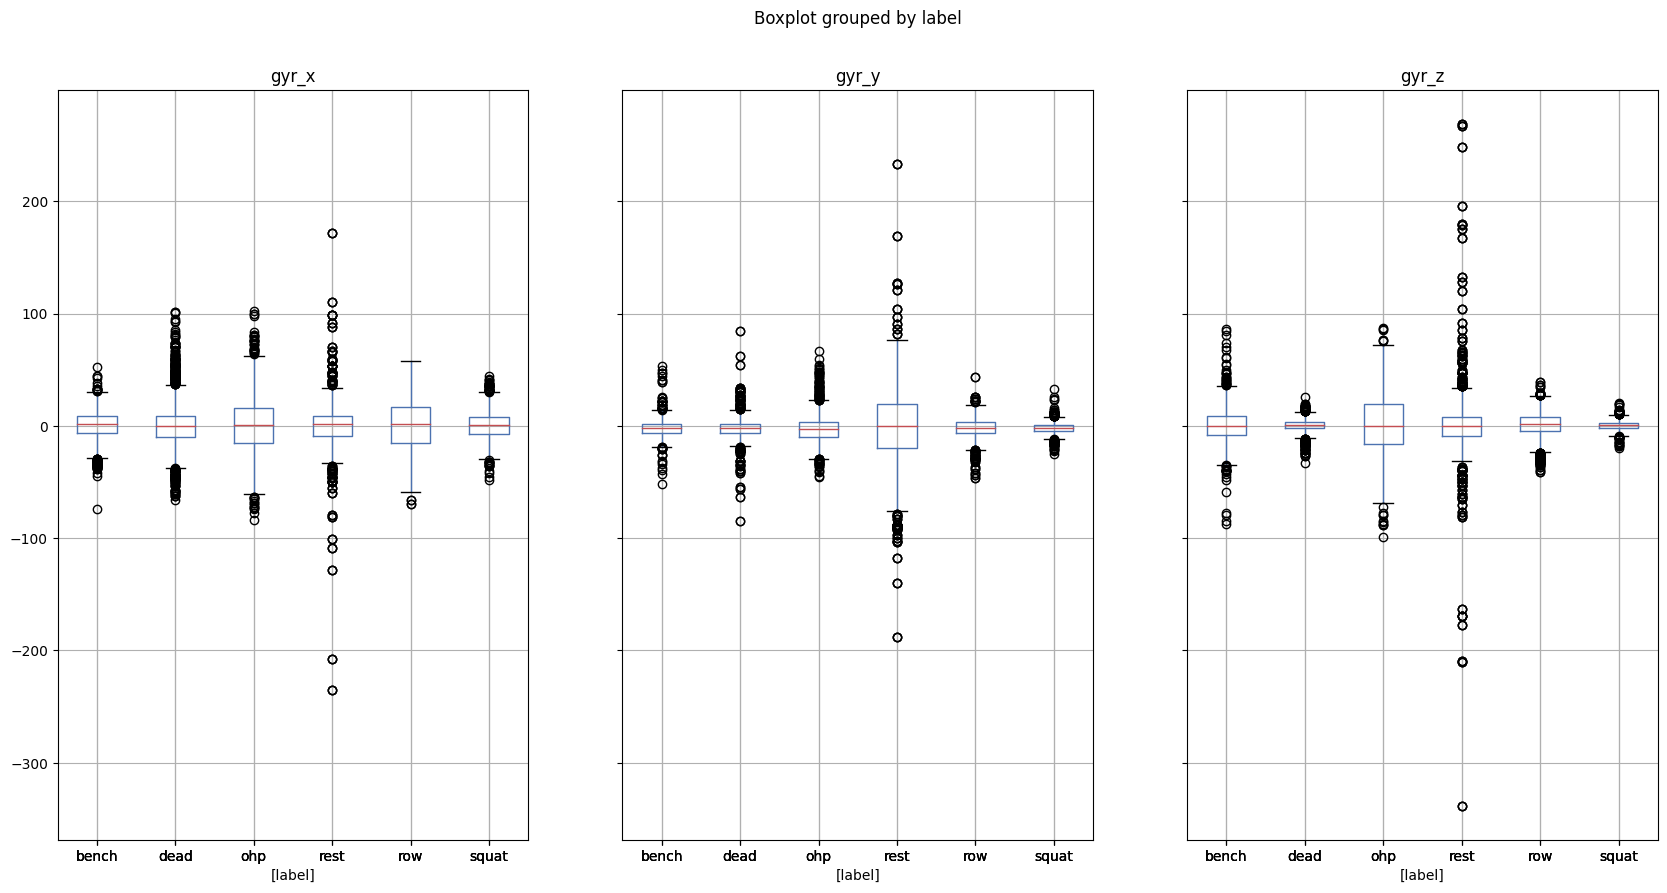

In [6]:
mpl.style.use('seaborn-v0_8-deep')
mpl.rcParams['figure.figsize']= (20,5)
mpl.rcParams['figure.dpi']= 100

df[outliers_columns[:3] + ['label']].boxplot(by ='label', figsize = (20,10),layout=(1,3))
df[outliers_columns[3:] + ['label']].boxplot(by ='label', figsize = (20,10),layout=(1,3))


In [7]:
def plot_binary_outliers(dataset, col, outlier_col, reset_index):
    """ Plot outliers in case of a binary outlier score. Here, the col specifies the real data
    column and outlier_col the columns with a binary value (outlier or not).

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): Column that you want to plot
        outlier_col (string): Outlier column marked with true/false
        reset_index (bool): whether to reset the index for plotting
    """

    # Taken from: https://github.com/mhoogen/ML4QS/blob/master/Python3Code/util/VisualizeDataset.py

    dataset = dataset.dropna(axis=0, subset=[col, outlier_col])
    dataset[outlier_col] = dataset[outlier_col].astype("bool")

    if reset_index:
        dataset = dataset.reset_index()

    fig, ax = plt.subplots()

    plt.xlabel("samples")
    plt.ylabel("value")

    # Plot non outliers in default color
    ax.plot(
        dataset.index[~dataset[outlier_col]],
        dataset[col][~dataset[outlier_col]],
        "+",
    )
    # Plot data points that are outliers in red
    ax.plot(
        dataset.index[dataset[outlier_col]],
        dataset[col][dataset[outlier_col]],
        "r+",
    )

    plt.legend(
        ["outlier " + col, "no outlier " + col],
        loc="upper center",
        ncol=2,
        fancybox=True,
        shadow=True,
    )
    plt.show()

# Interquartile range (distribution based)

 Insert IQR function

In [8]:
def mark_outliers_iqr(dataset, col):
    """Function to mark values as outliers using the IQR method.

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column
        indicating whether the value is an outlier or not.
    """

    dataset = dataset.copy()

    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dataset[col + "_outlier"] = (dataset[col] < lower_bound) | (
        dataset[col] > upper_bound
    )

    return dataset

Plot a single column

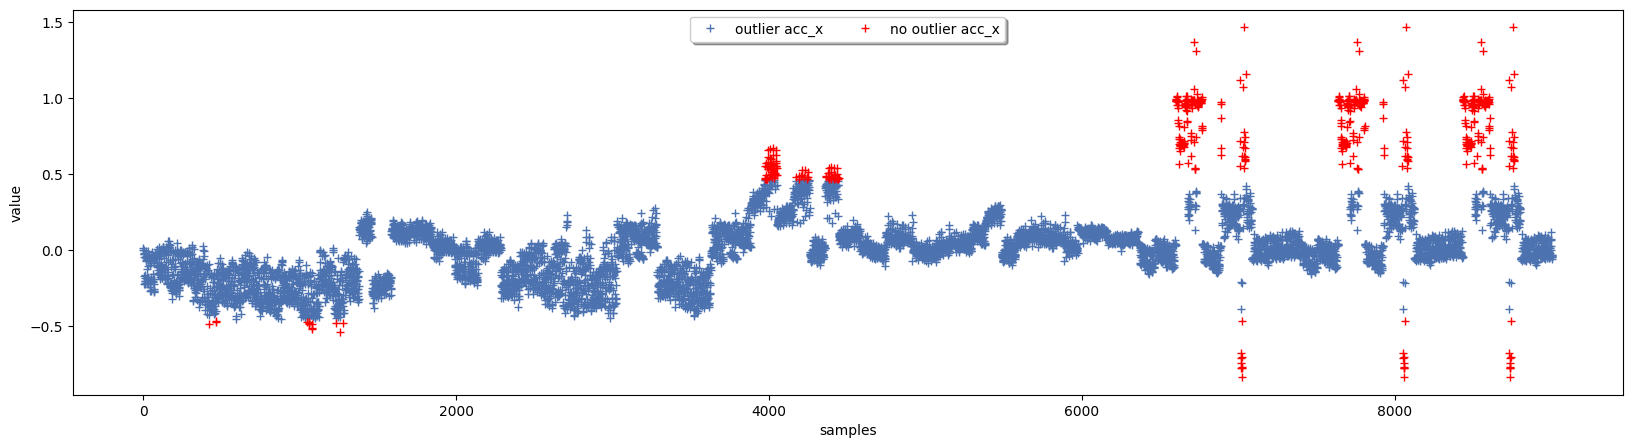

In [9]:
col = "acc_x"
dataset = mark_outliers_iqr(df,col)
plot_binary_outliers(dataset= dataset, col=col , outlier_col= col + '_outlier',reset_index = True)

In [10]:
dataset

acc_x     acc_y     acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                        participant  label category  set  acc_x_outlier  
epoch (ms)                                                               
2019-01-11 15:08:05.200           B  bench    heavy   71          False  
2019-01-11 15:08:05.400           B  bench    heavy   71          False  
2019-01-11 15:08:05.600           B  bench    heavy   71          False  
2019-01-11 15:08:05.800           B  bench    heavy   71          False  
2019-01-11 15:08:06.000           B  bench    heavy   71          False  
...                             ...    ...      ...  ...            ...  
2019-01-20 17:33:27.000           E    row   medium   68          False  
2019-01-20 17:33:27.200           E    row   medium   68          False  
2019-01-20 17:33:27.400           E    row   medium   68          False  
2019-01-20 17:33:27.600           E    row   medium   68          False  
2019-01-20 17:33:27.800           E    row   medium   68          False  

[9009 rows x 11 columns]

loop over all columns

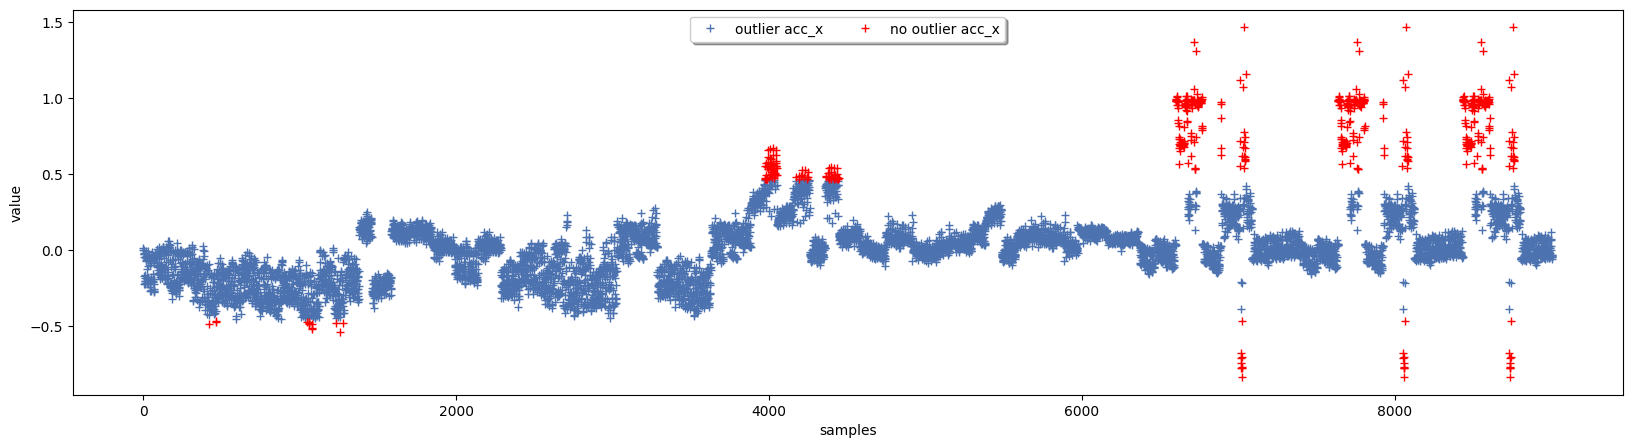

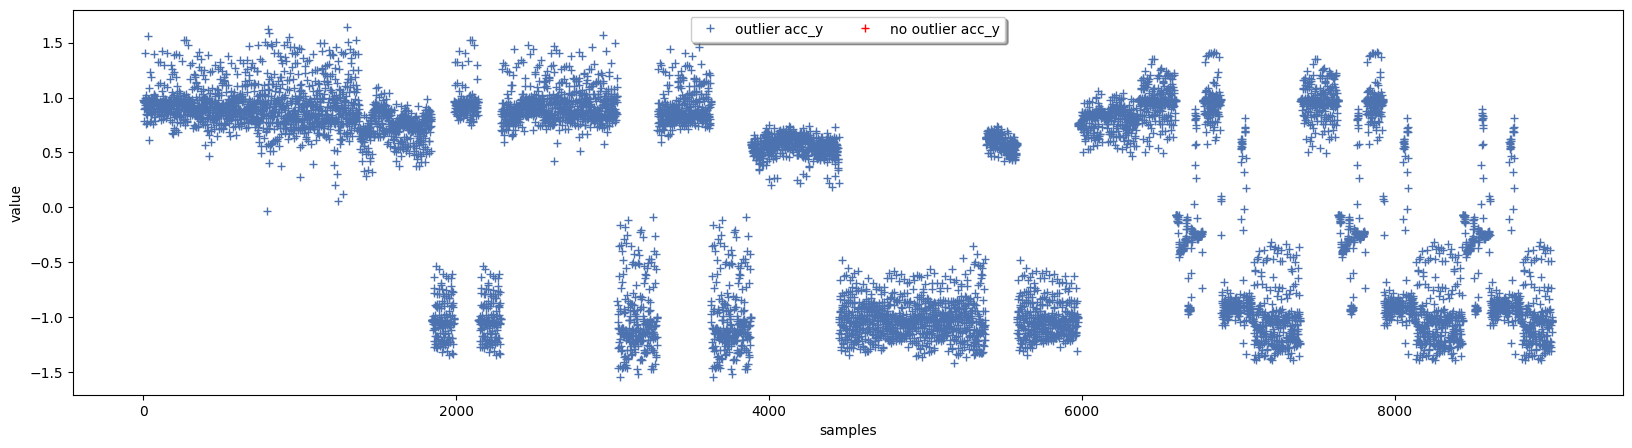

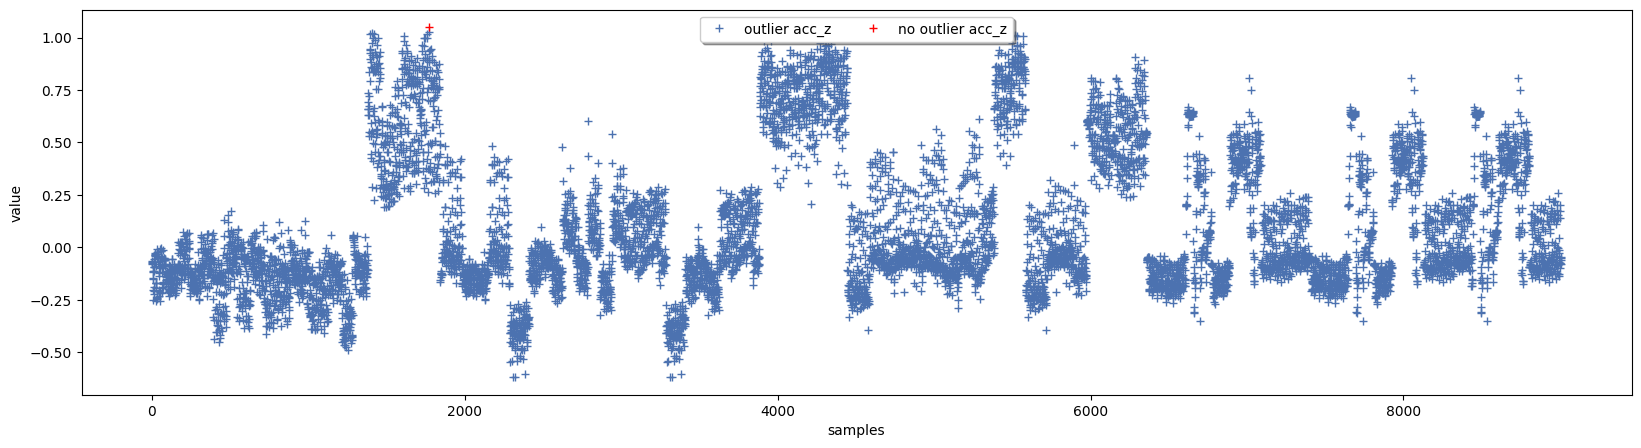

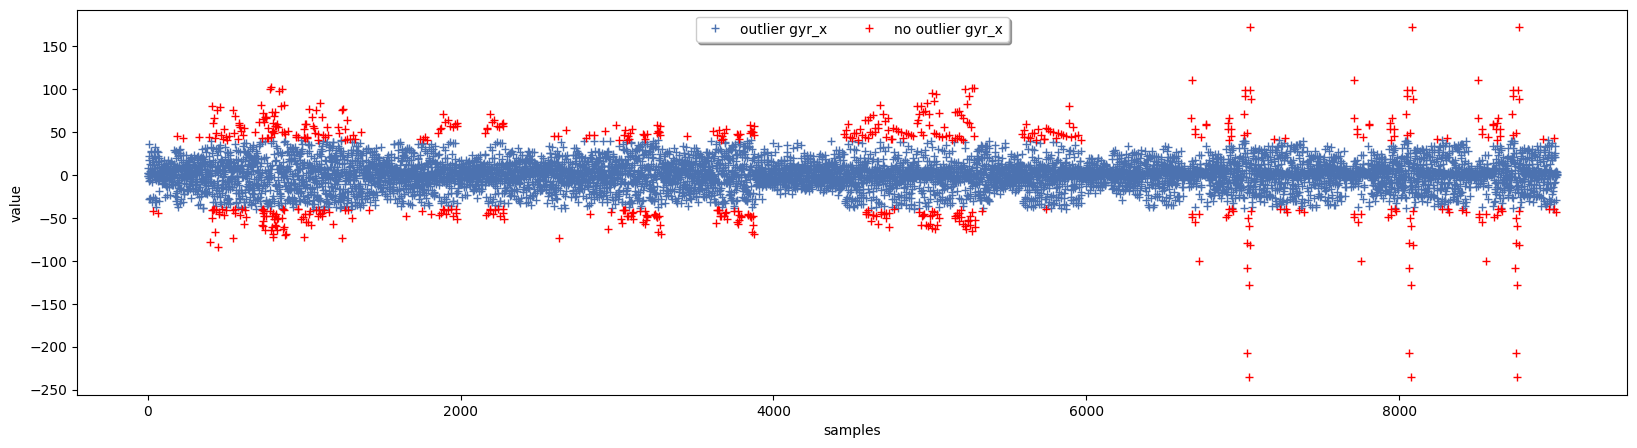

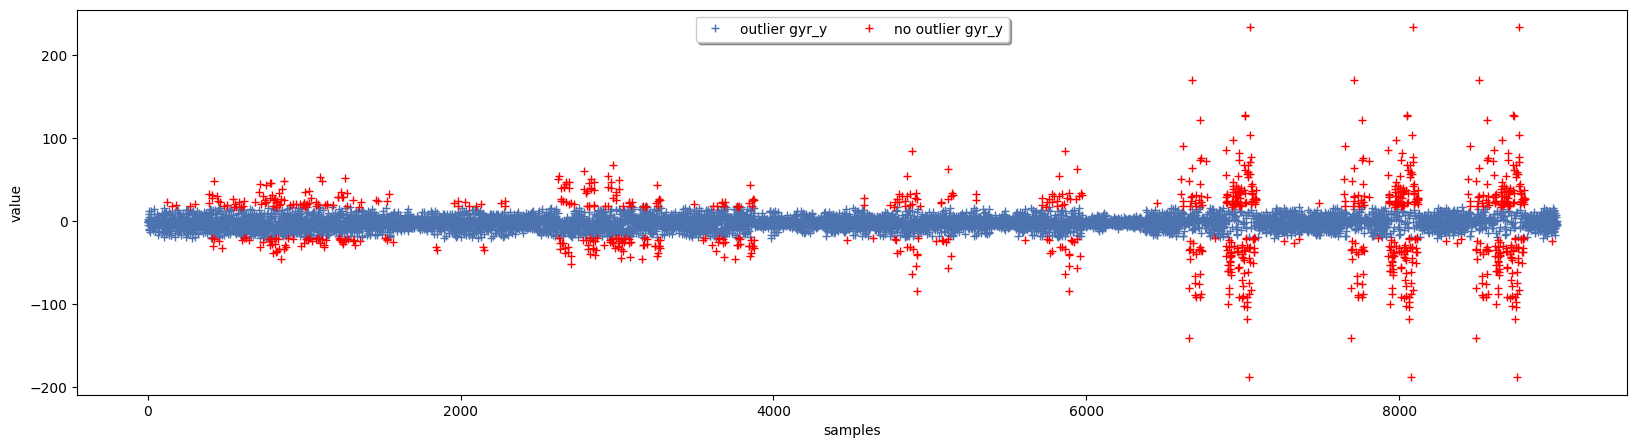

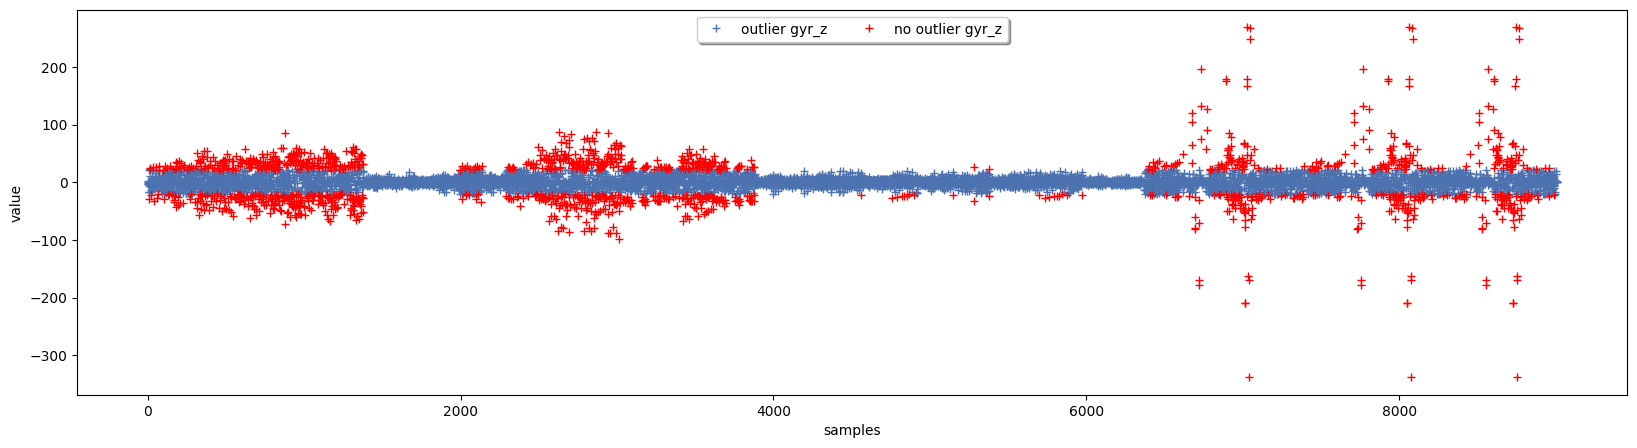

In [11]:
for col in  outliers_columns:

    dataset = mark_outliers_iqr(df,col)
    plot_binary_outliers(dataset= dataset, col=col , outlier_col= col + '_outlier',reset_index = True)


# Chauvenets criteron (distribution based)

check for normal distribution

array([[<Axes: title={'center': 'bench'}, ylabel='Frequency'>,
        <Axes: title={'center': 'dead'}, ylabel='Frequency'>,
        <Axes: title={'center': 'ohp'}, ylabel='Frequency'>],
       [<Axes: title={'center': 'rest'}, ylabel='Frequency'>,
        <Axes: title={'center': 'row'}, ylabel='Frequency'>,
        <Axes: title={'center': 'squat'}, ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

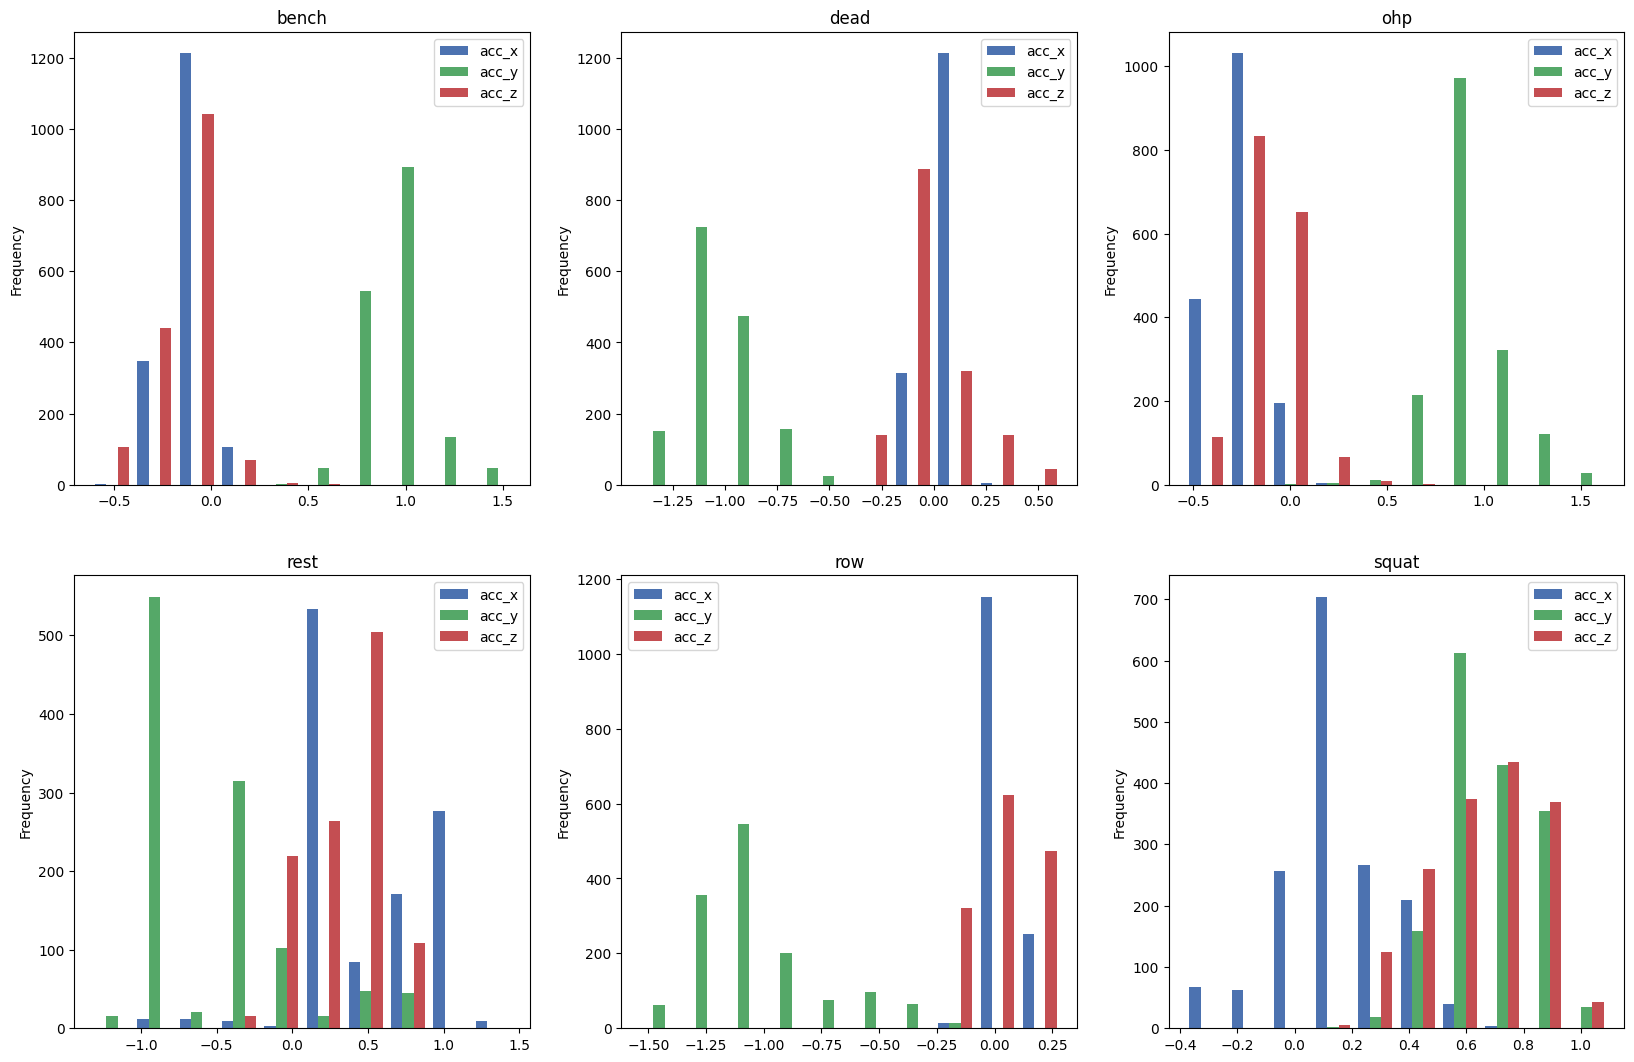

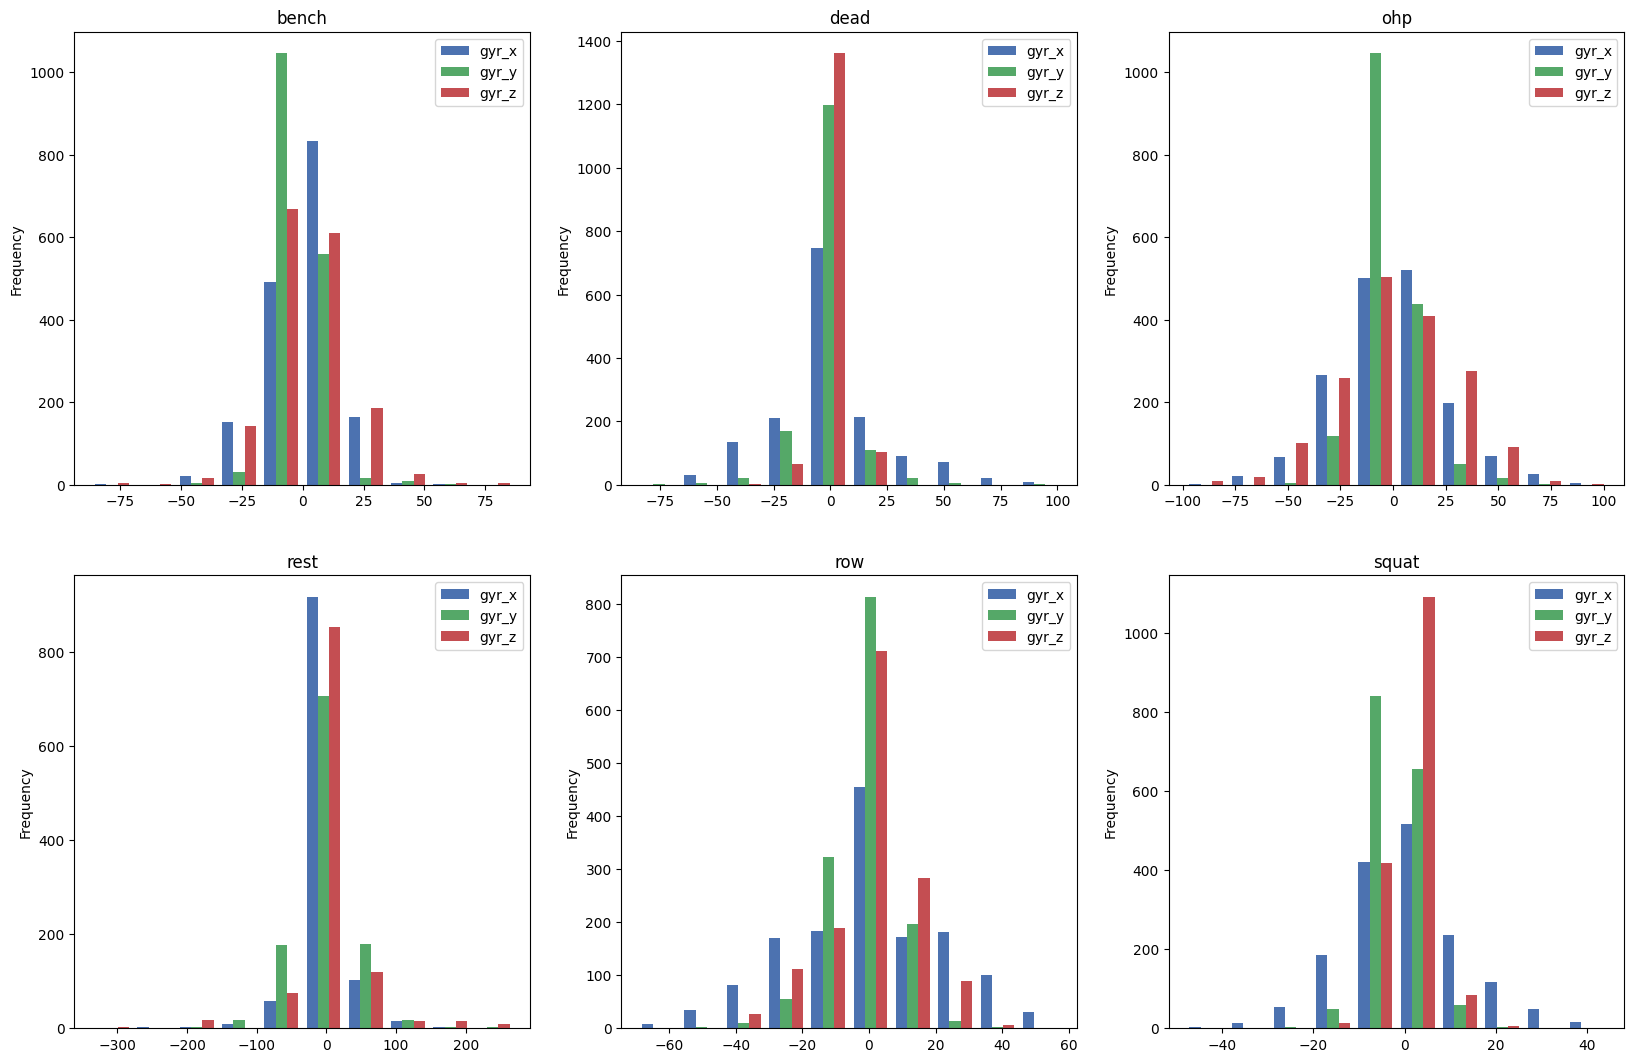

In [12]:
df[outliers_columns[:3] + ['label']].plot.hist(by ='label', figsize = (20,20),layout=(3,3))
df[outliers_columns[3:] + ['label']].plot.hist(by ='label', figsize = (20,20),layout=(3,3))


Insert chauvenet's finction

In [13]:
def mark_outliers_chauvenet(dataset, col, C=2):
    """Finds outliers in the specified column of datatable and adds a binary column with
    the same name extended with '_outlier' that expresses the result per data point.

    Taken from: https://github.com/mhoogen/ML4QS/blob/master/Python3Code/Chapter3/OutlierDetection.py

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to
        C (int, optional): Degree of certainty for the identification of outliers given the assumption
                           of a normal distribution, typicaly between 1 - 10. Defaults to 2.

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column
        indicating whether the value is an outlier or not.
    """

    dataset = dataset.copy()
    # Compute the mean and standard deviation.
    mean = dataset[col].mean()
    std = dataset[col].std()
    N = len(dataset.index)
    criterion = 1.0 / (C * N)

    # Consider the deviation for the data points.
    deviation = abs(dataset[col] - mean) / std

    # Express the upper and lower bounds.
    low = -deviation / math.sqrt(C)
    high = deviation / math.sqrt(C)
    prob = []
    mask = []

    # Pass all rows in the dataset.
    for i in range(0, len(dataset.index)):
        # Determine the probability of observing the point
        prob.append(
            1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
        )
        # And mark as an outlier when the probability is below our criterion.
        mask.append(prob[i] < criterion)
    dataset[col + "_outlier"] = mask
    return dataset

Loop over all columns

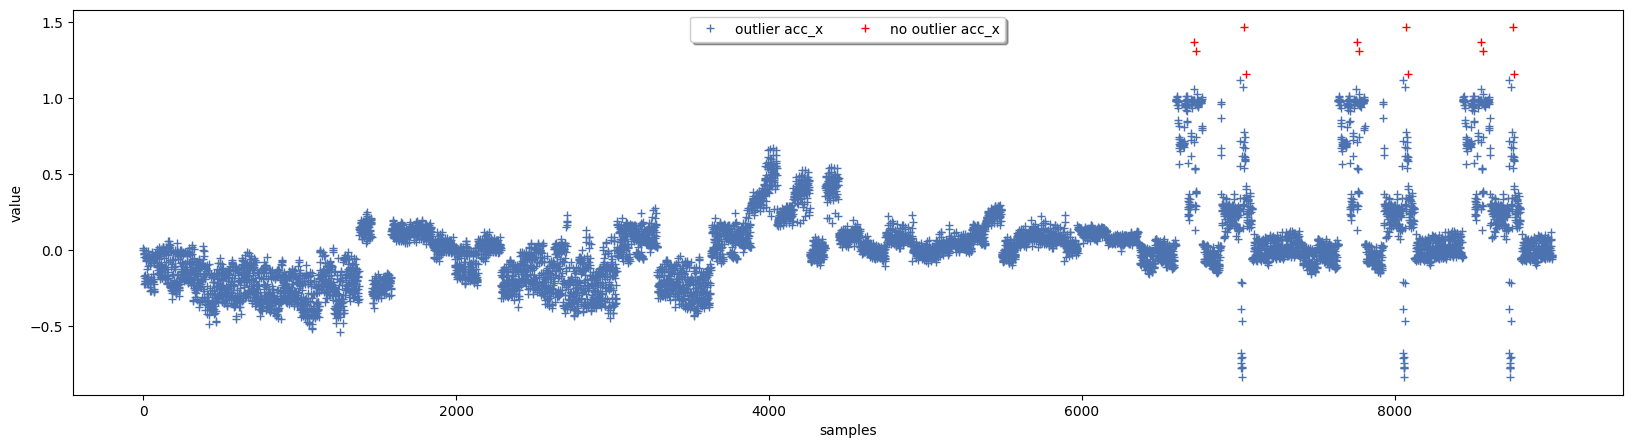

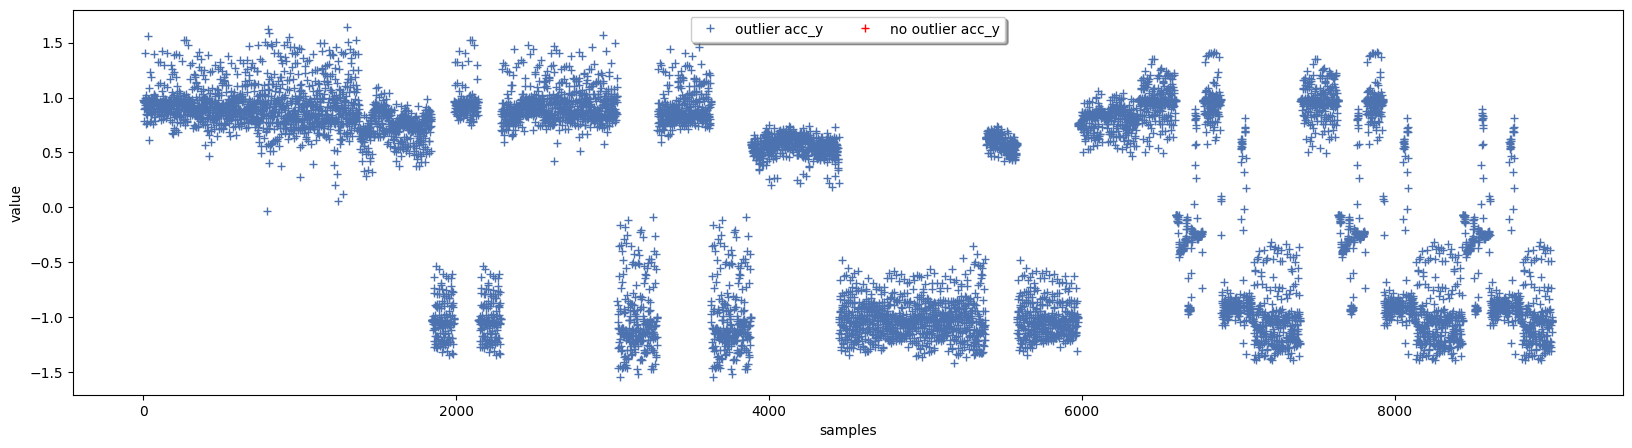

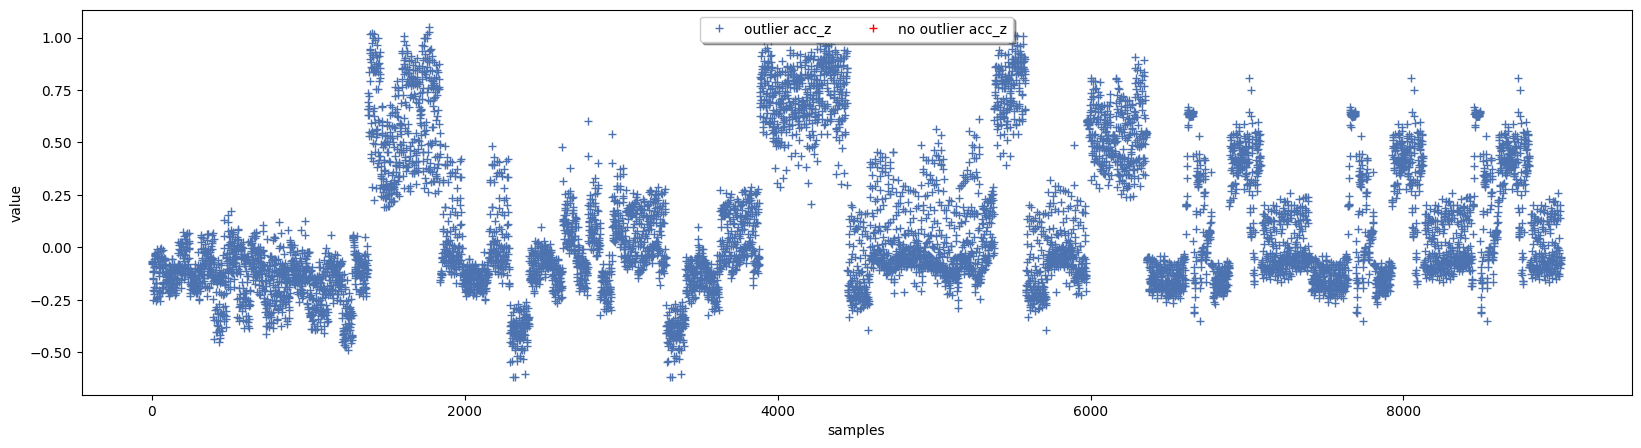

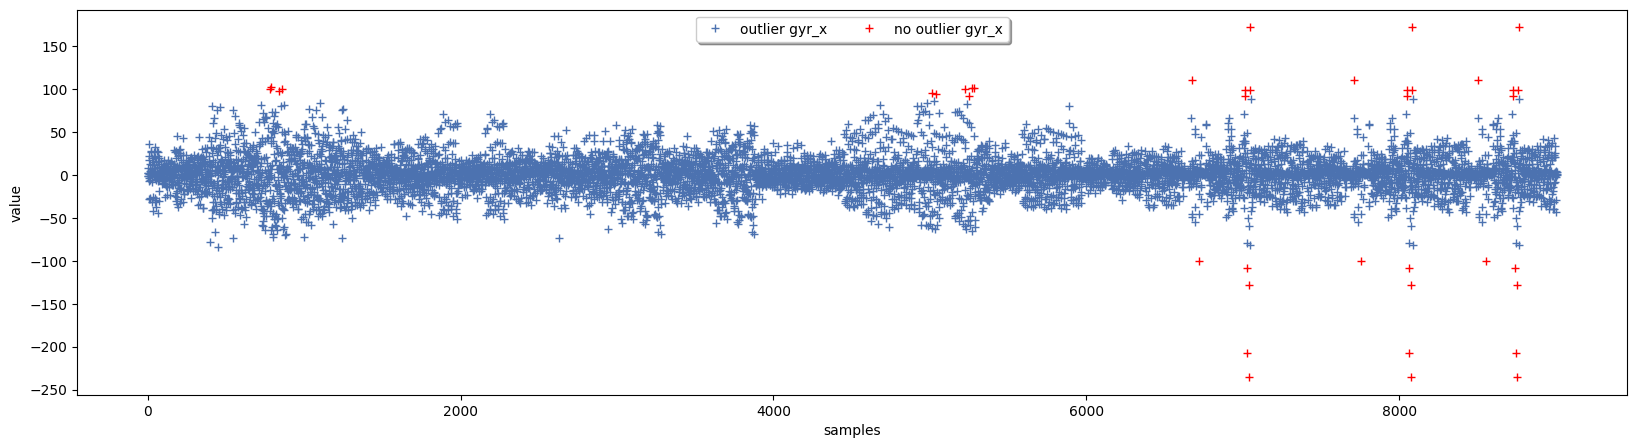

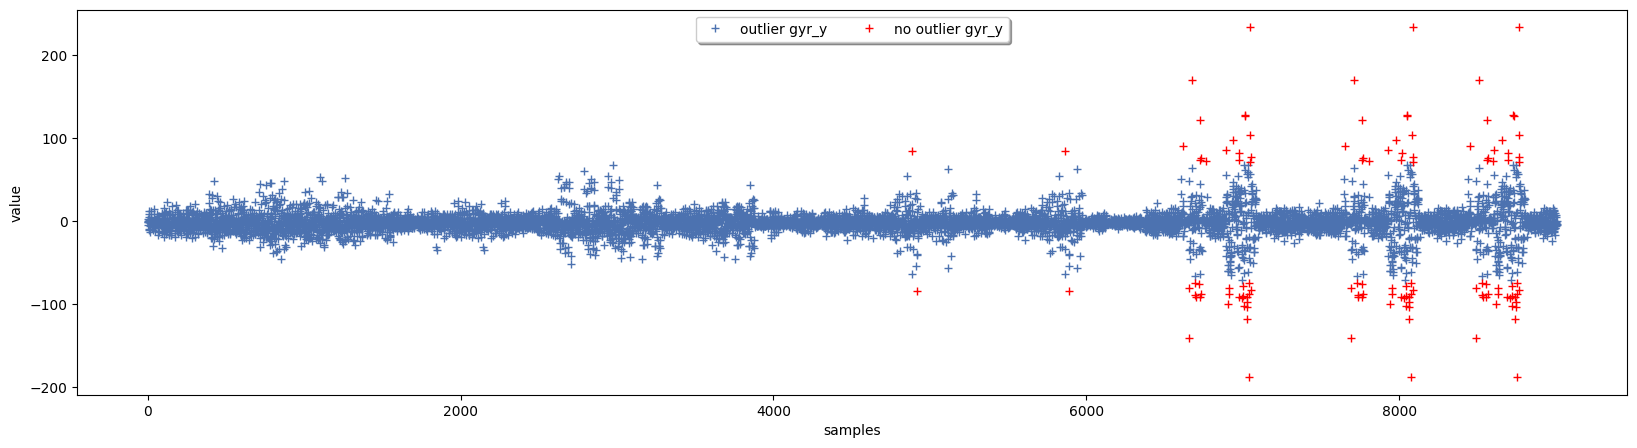

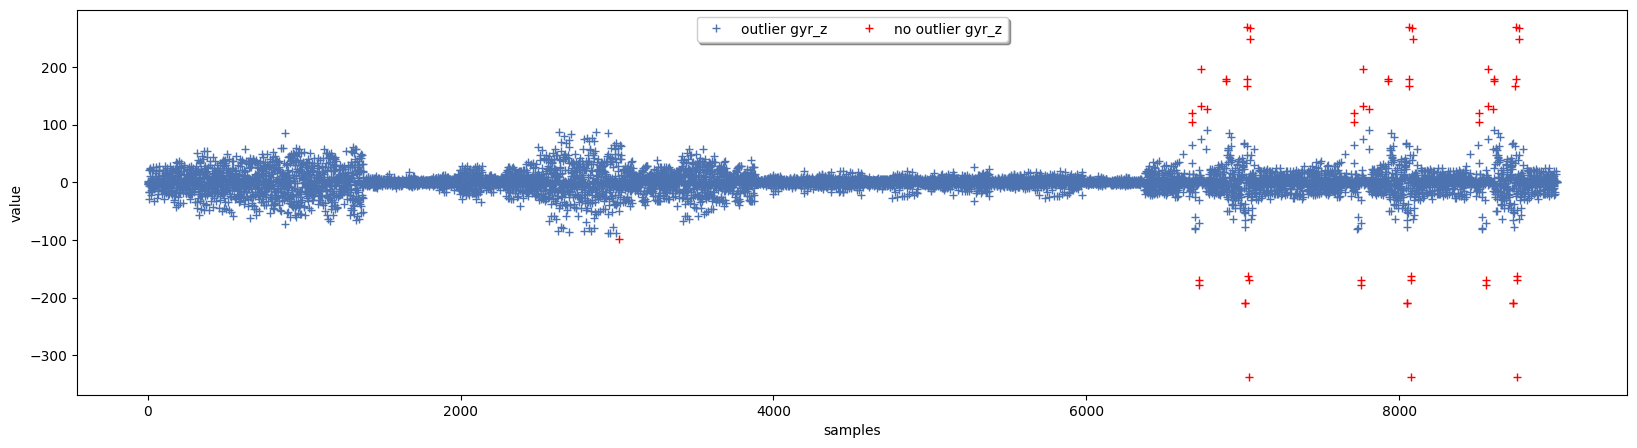

In [14]:
for col in  outliers_columns:

    dataset = mark_outliers_chauvenet(df,col)
    plot_binary_outliers(dataset= dataset, col=col , outlier_col= col + '_outlier',reset_index = True)


# Local outlier factor (distance based)

Insert lof function

In [15]:
def mark_outliers_lof(dataset, columns, n=20):
    """Mark values as outliers using LOF

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to
        n (int, optional): n_neighbors. Defaults to 20.

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column
        indicating whether the value is an outlier or not.
    """

    dataset = dataset.copy()

    lof = LocalOutlierFactor(n_neighbors=n)
    data = dataset[columns]
    outliers = lof.fit_predict(data)
    X_scores = lof.negative_outlier_factor_

    dataset["outlier_lof"] = outliers == -1
    return dataset, outliers, X_scores

 Loop over all columns

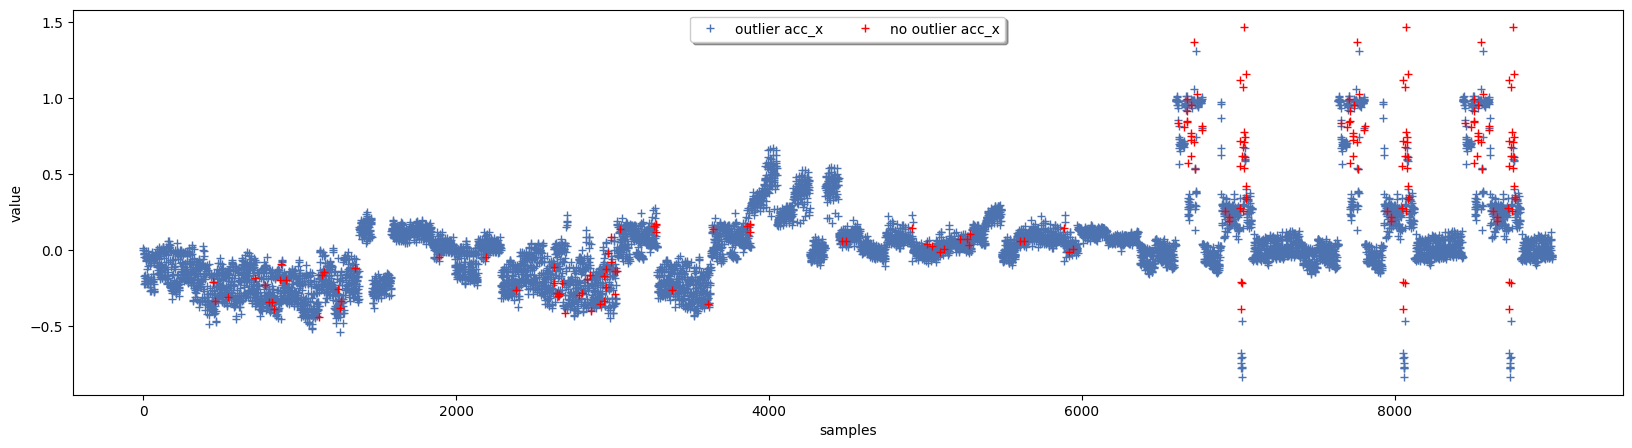

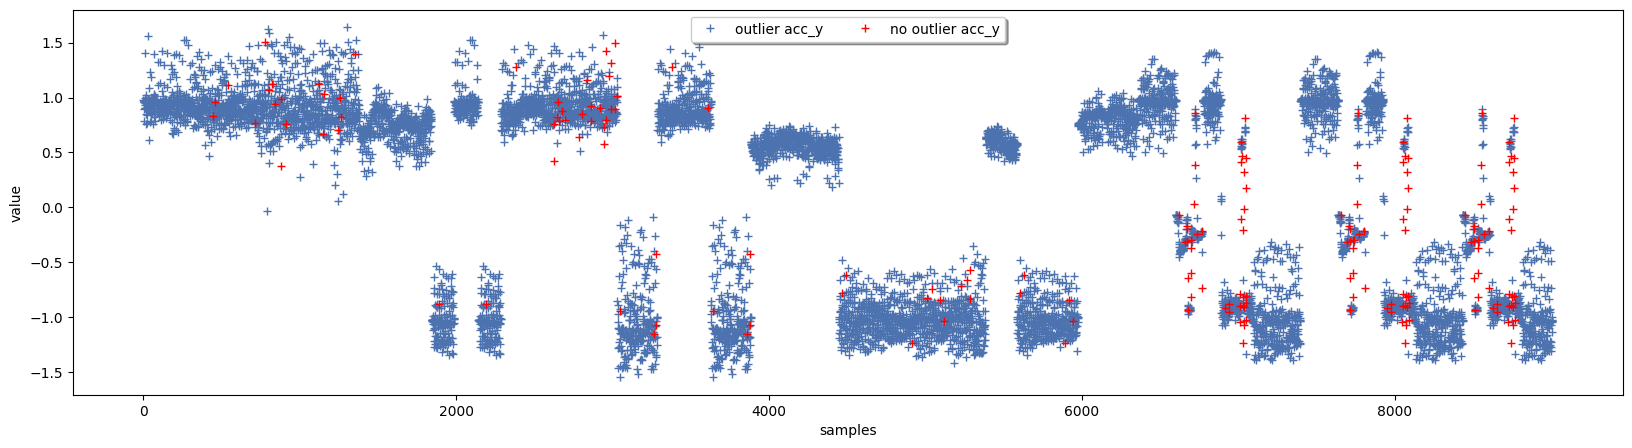

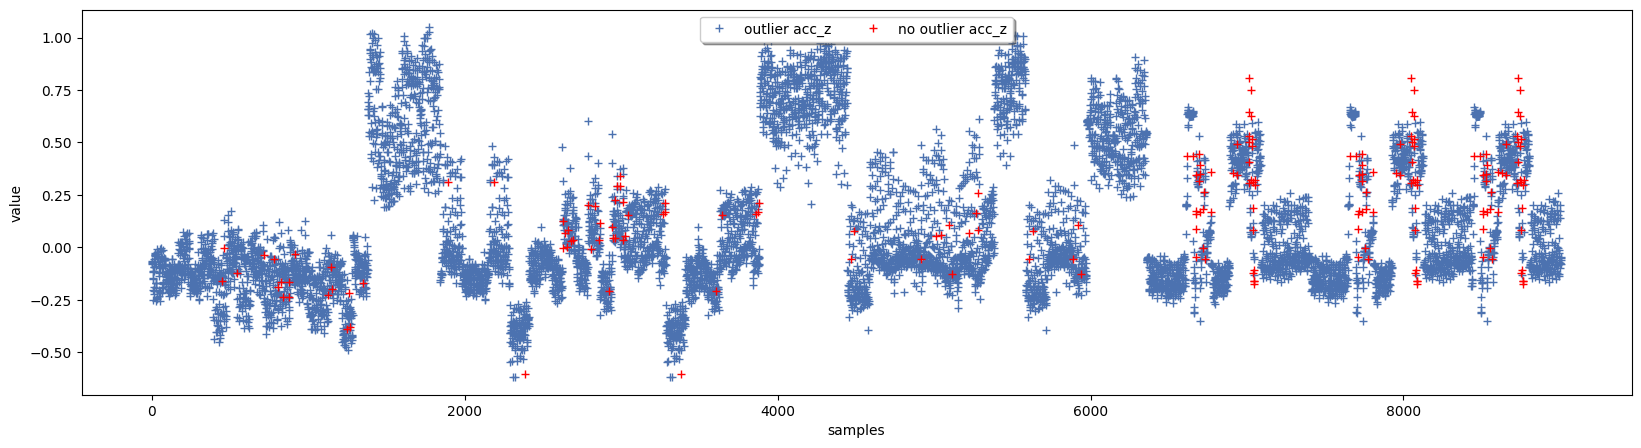

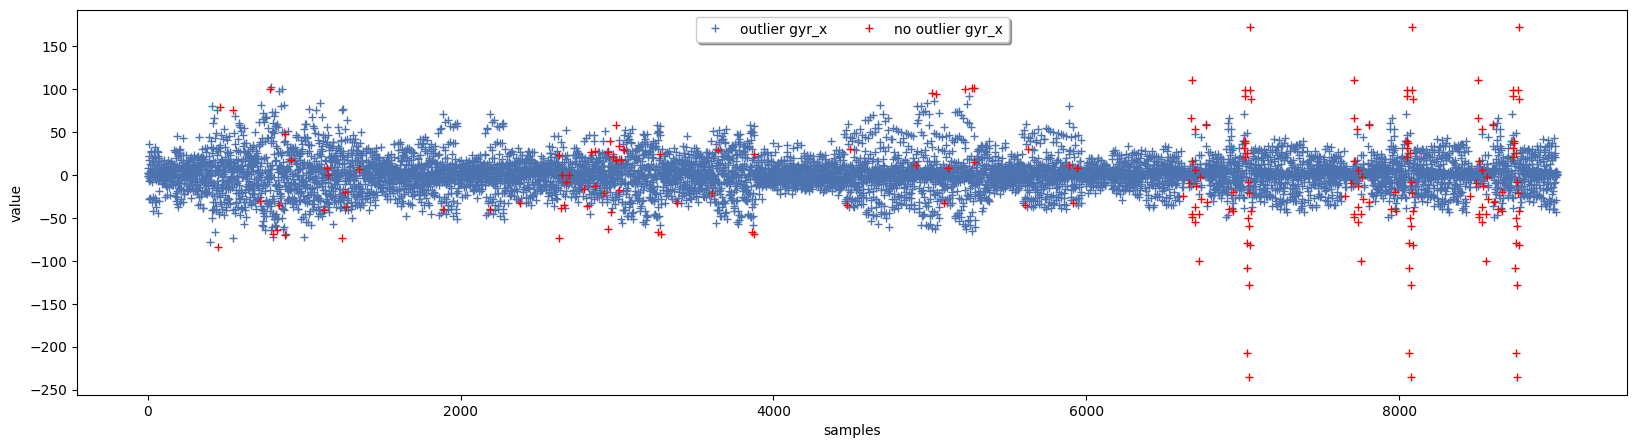

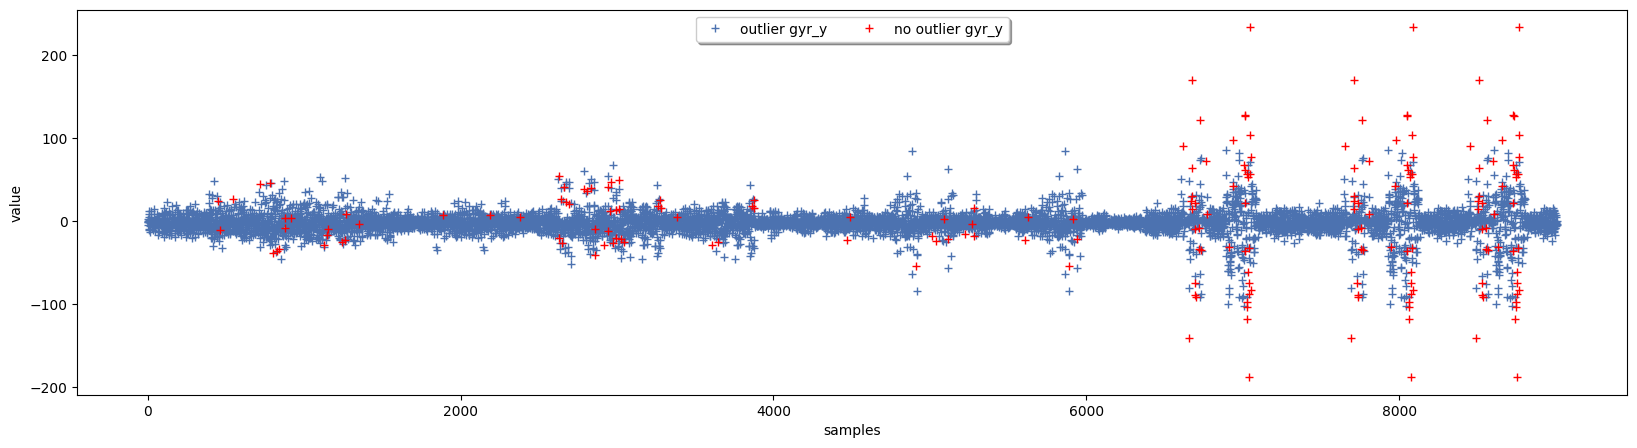

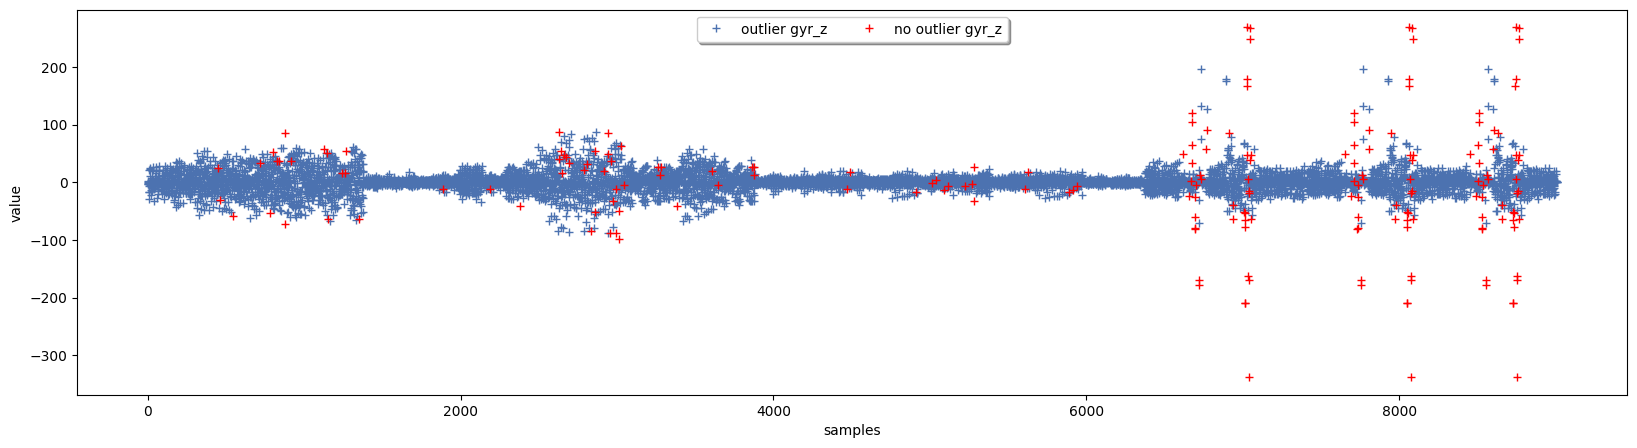

In [16]:
dataset, outliers, X_scores = mark_outliers_lof(df,outliers_columns)
for col in  outliers_columns:
    plot_binary_outliers(dataset= dataset, col=col , outlier_col= 'outlier_lof',reset_index = True)

# Check outliers grouped by label

IQR

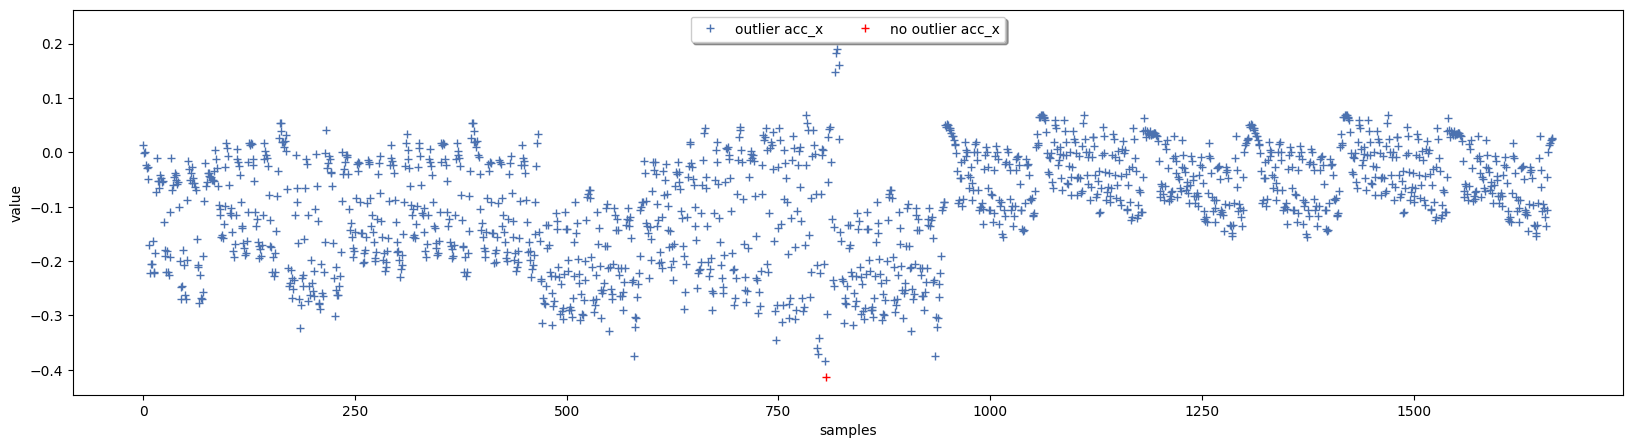

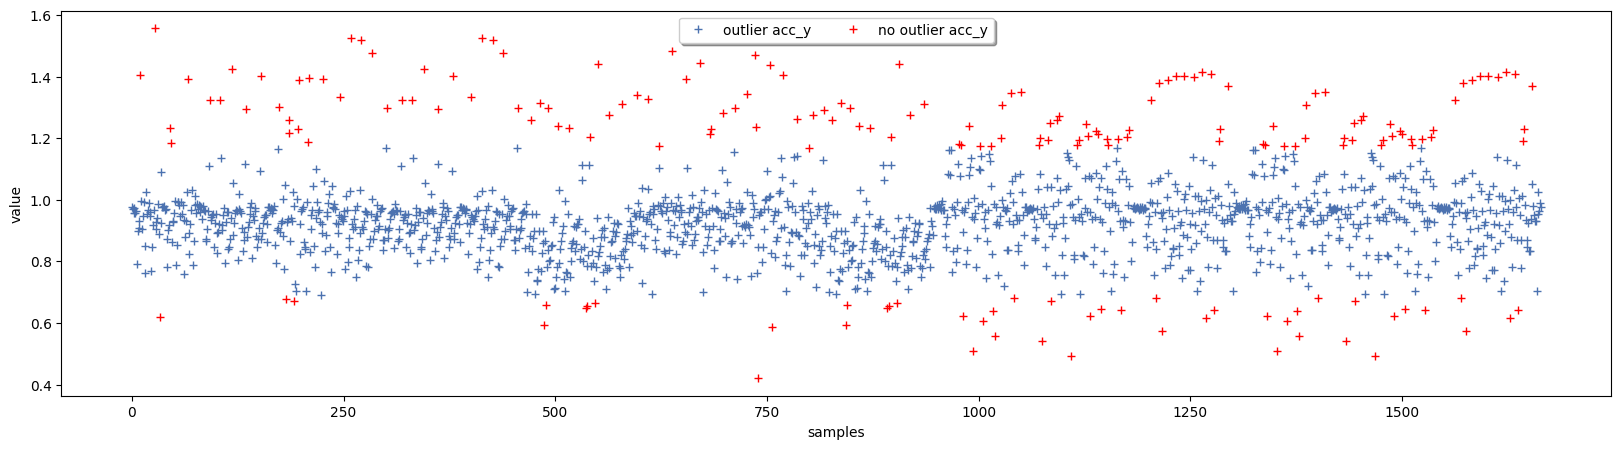

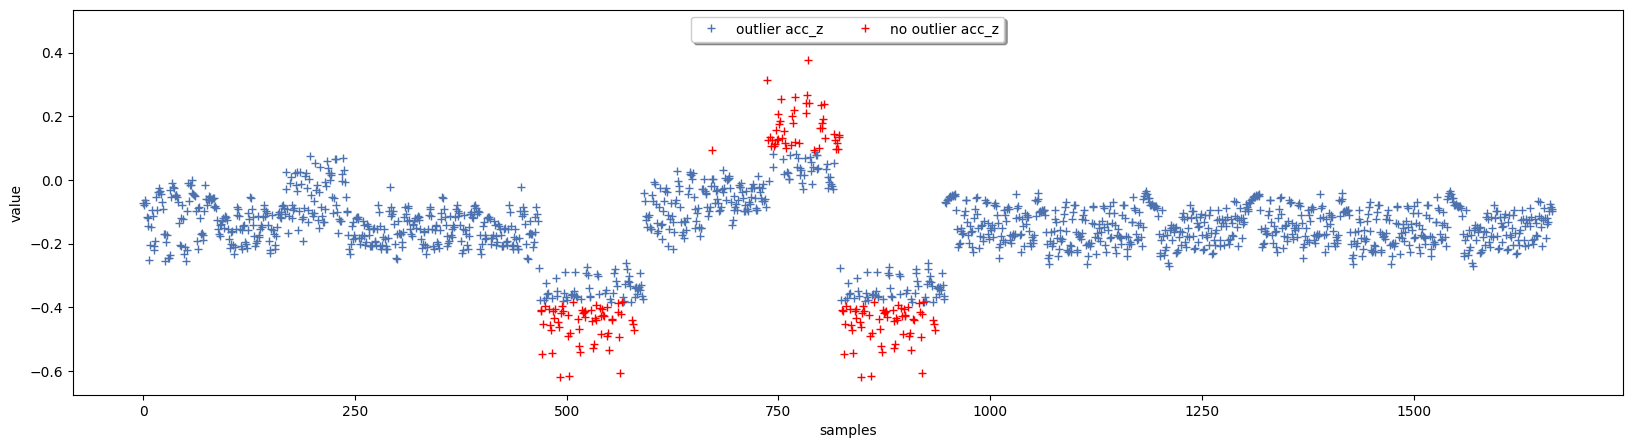

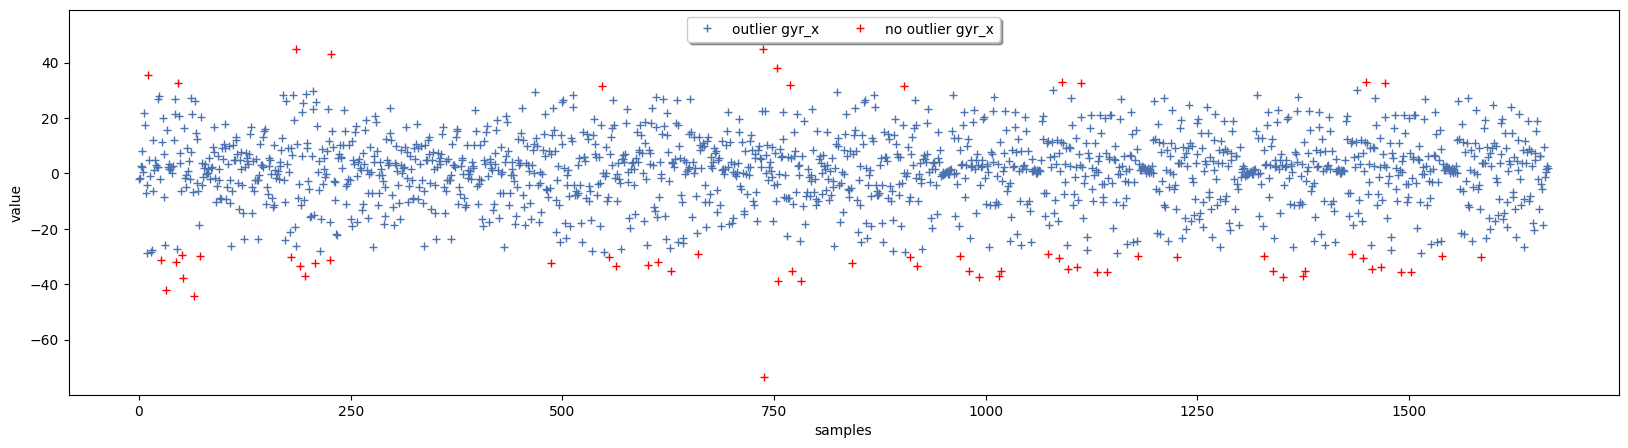

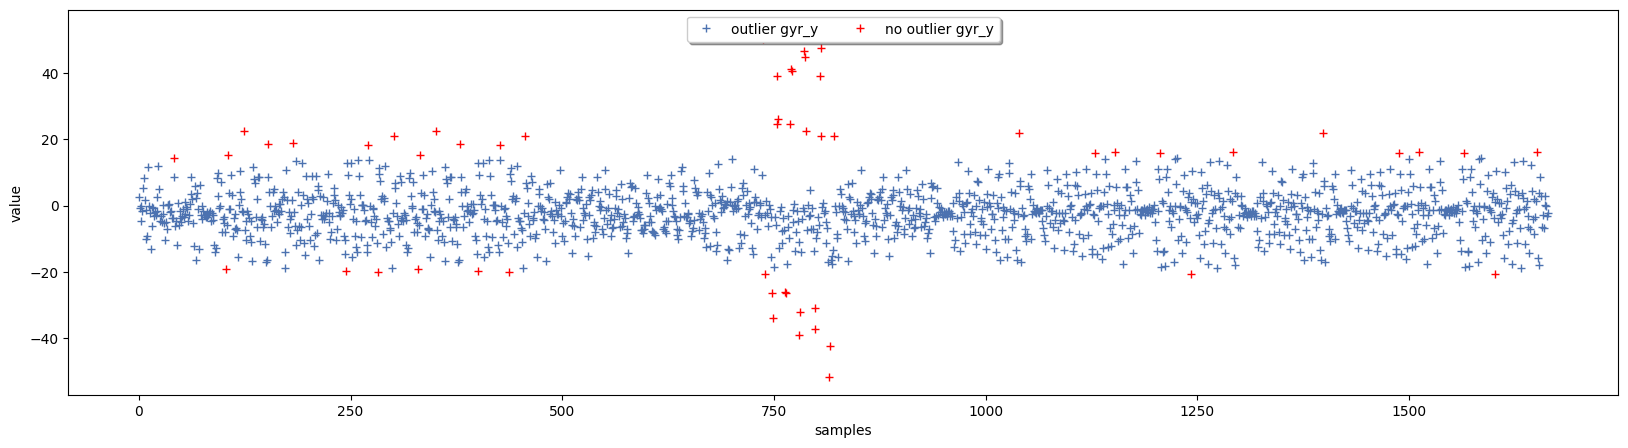

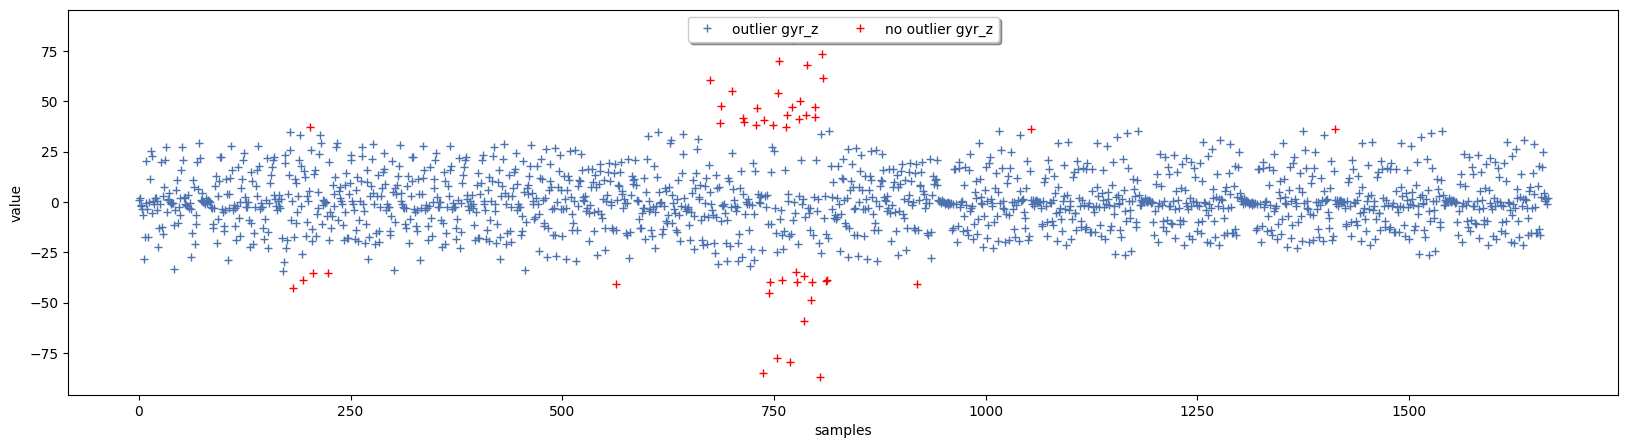

In [17]:
label = "bench"
for col in  outliers_columns:

    dataset = mark_outliers_iqr(df[df['label']==label],col)
    plot_binary_outliers(dataset, col ,  col + '_outlier',reset_index = True)





Chauvenet's

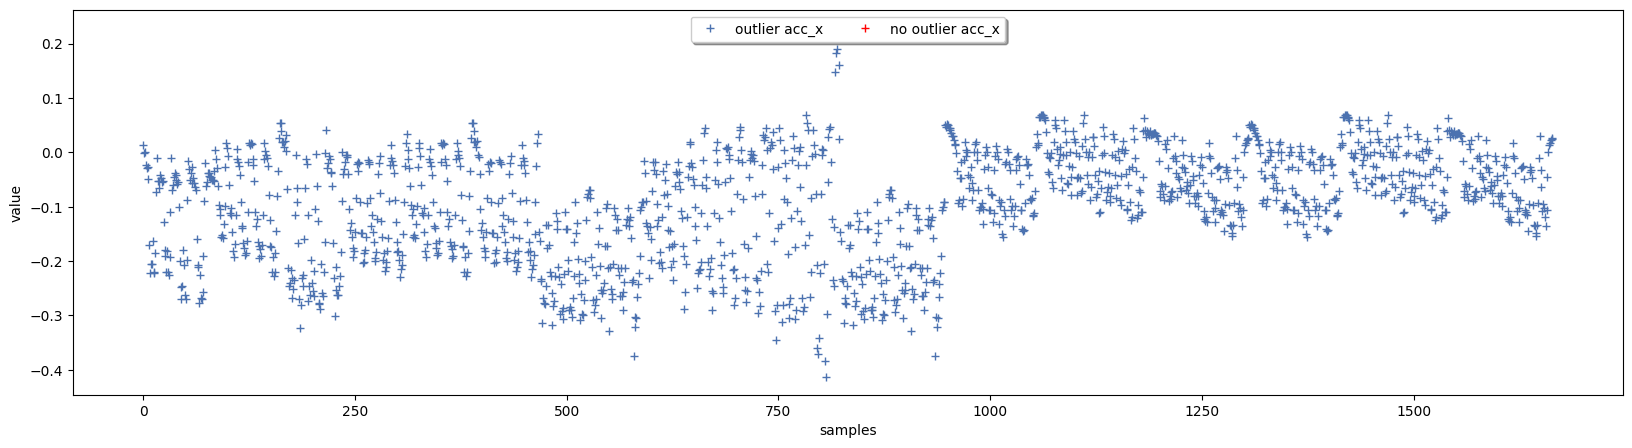

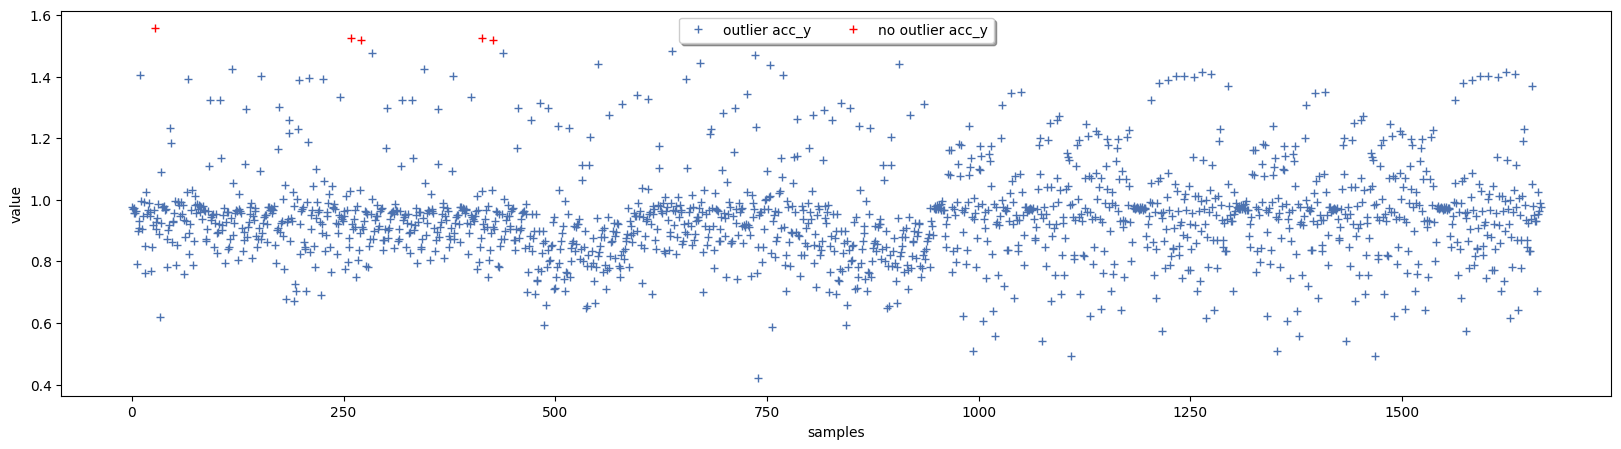

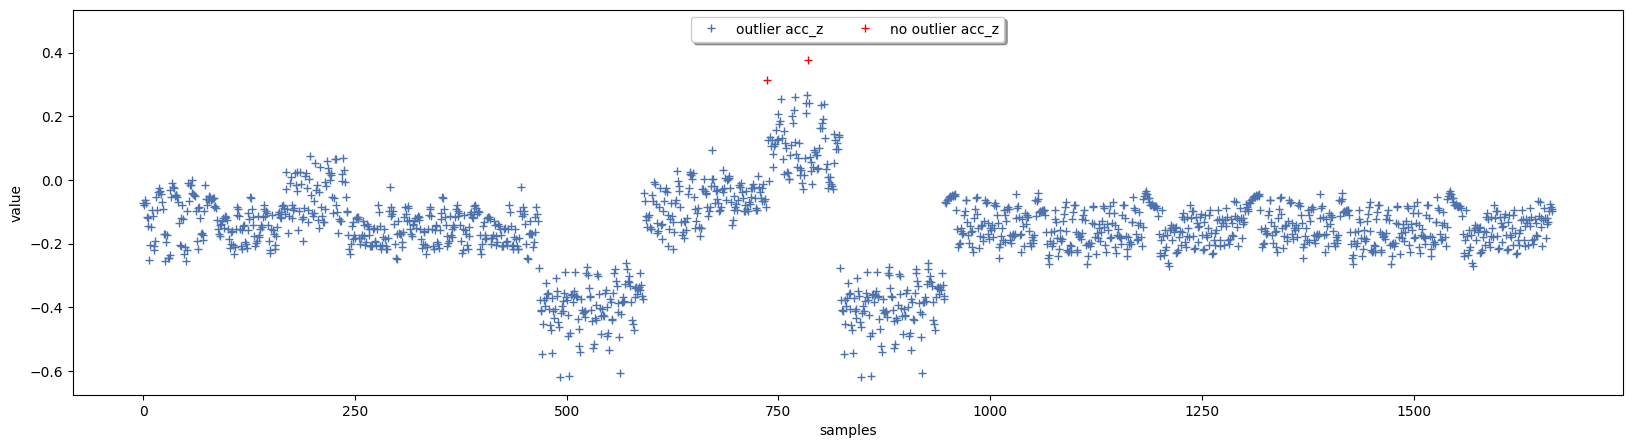

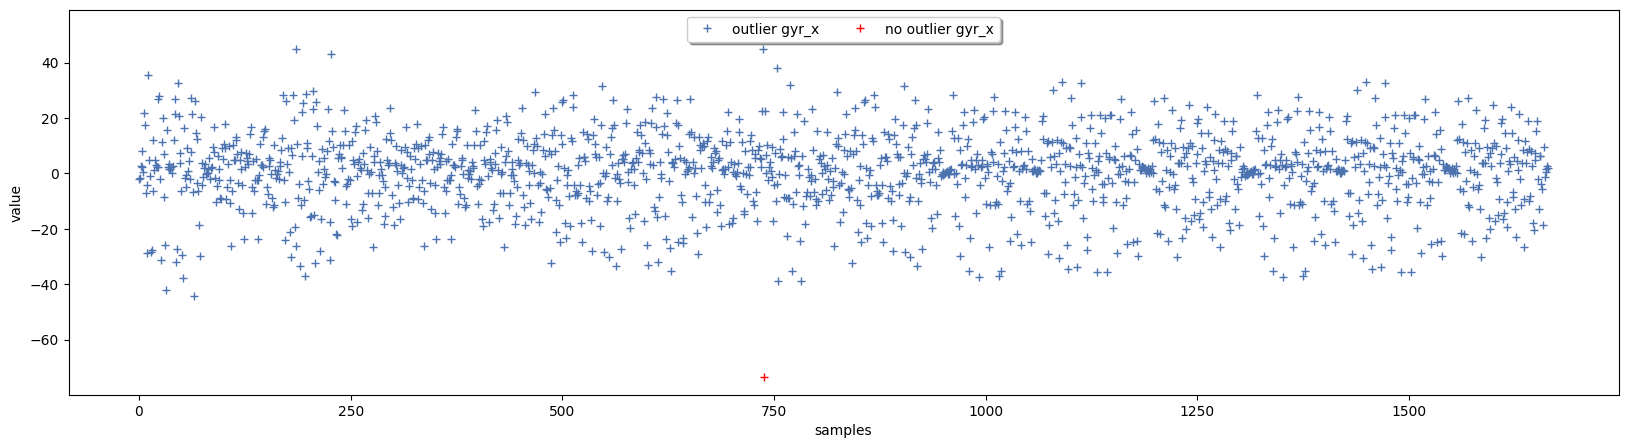

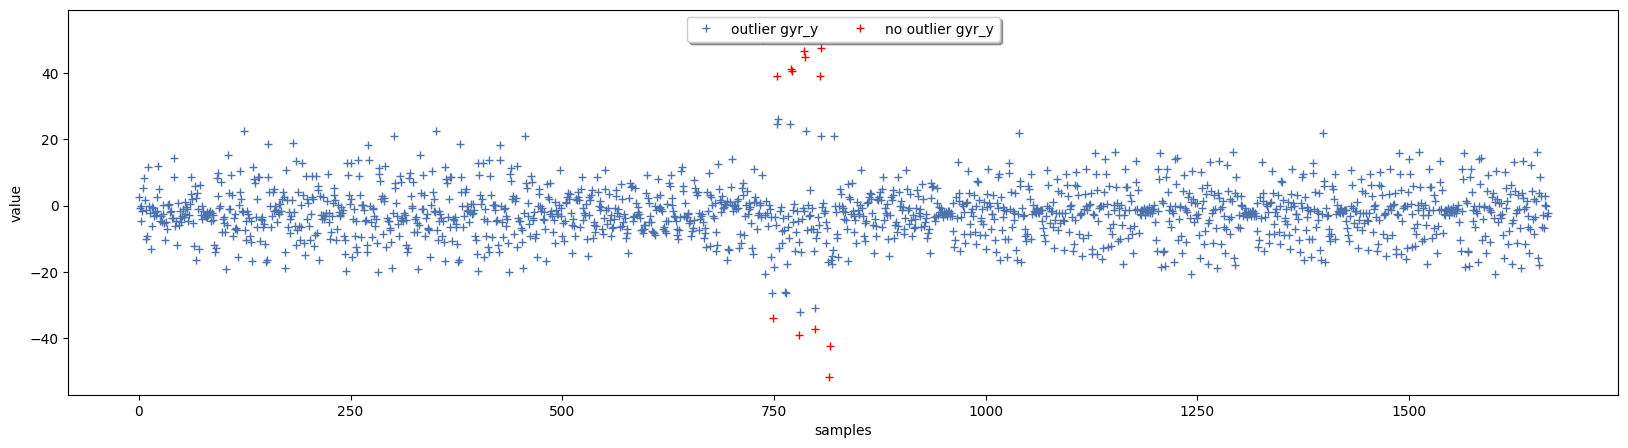

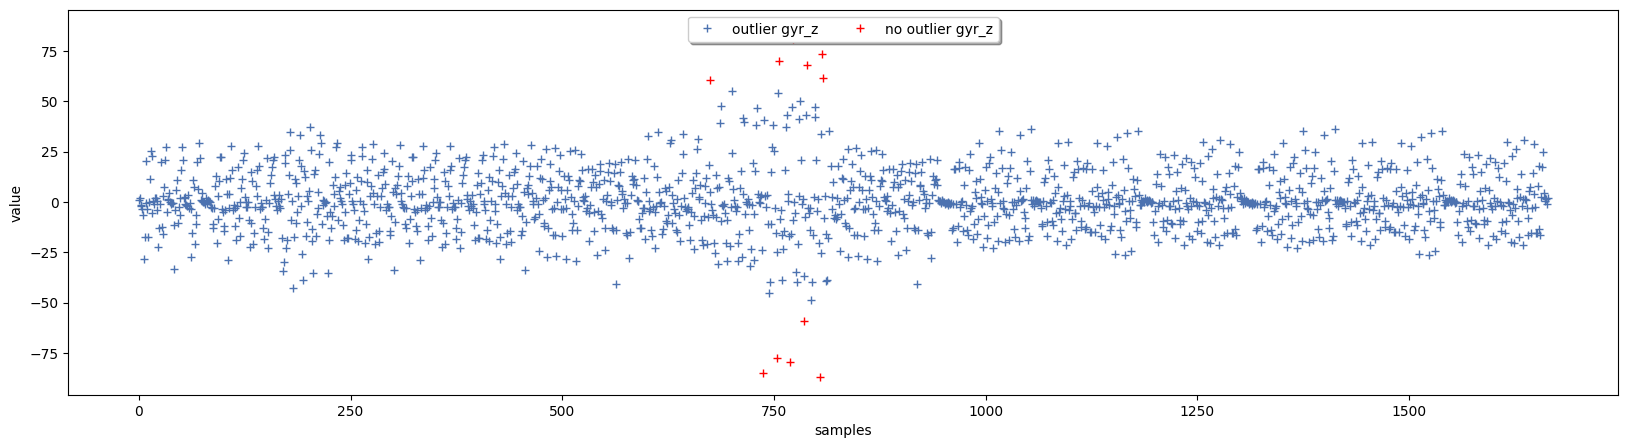

In [18]:
for col in  outliers_columns:

    dataset = mark_outliers_chauvenet(df[df['label']==label],col)
    plot_binary_outliers(dataset, col ,  col + '_outlier',reset_index = True)

Lof

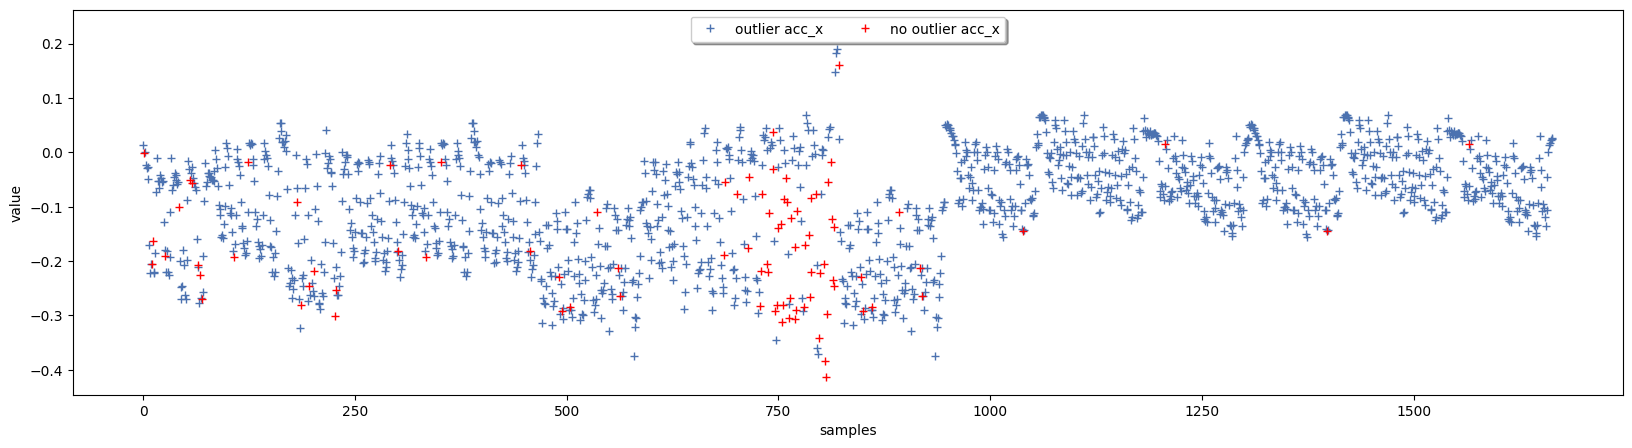

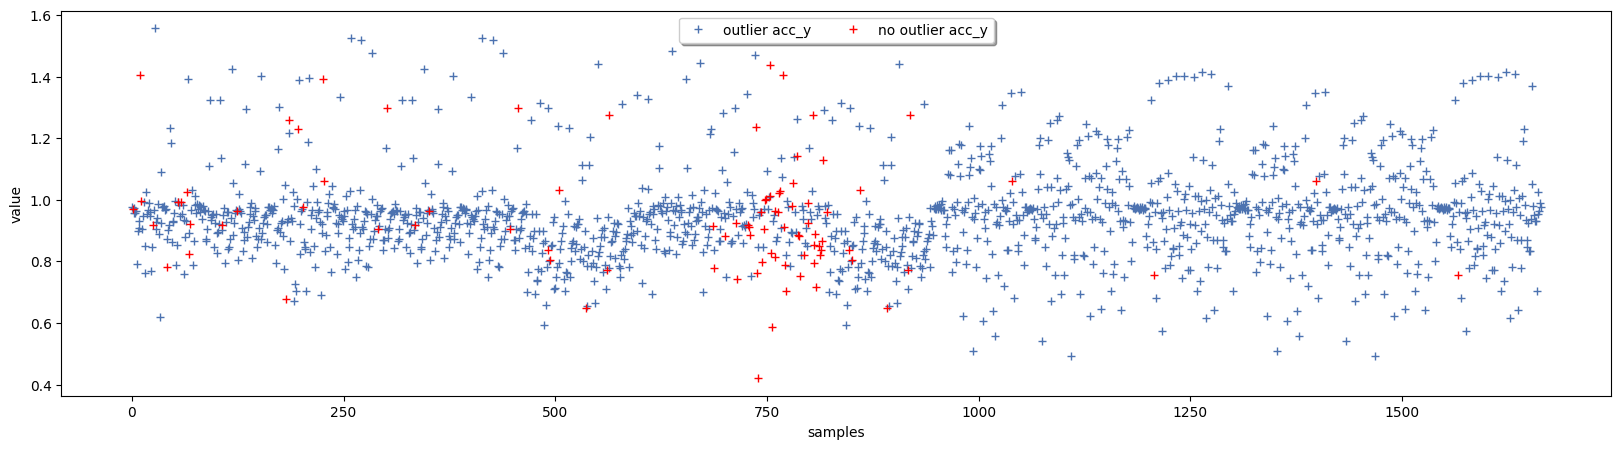

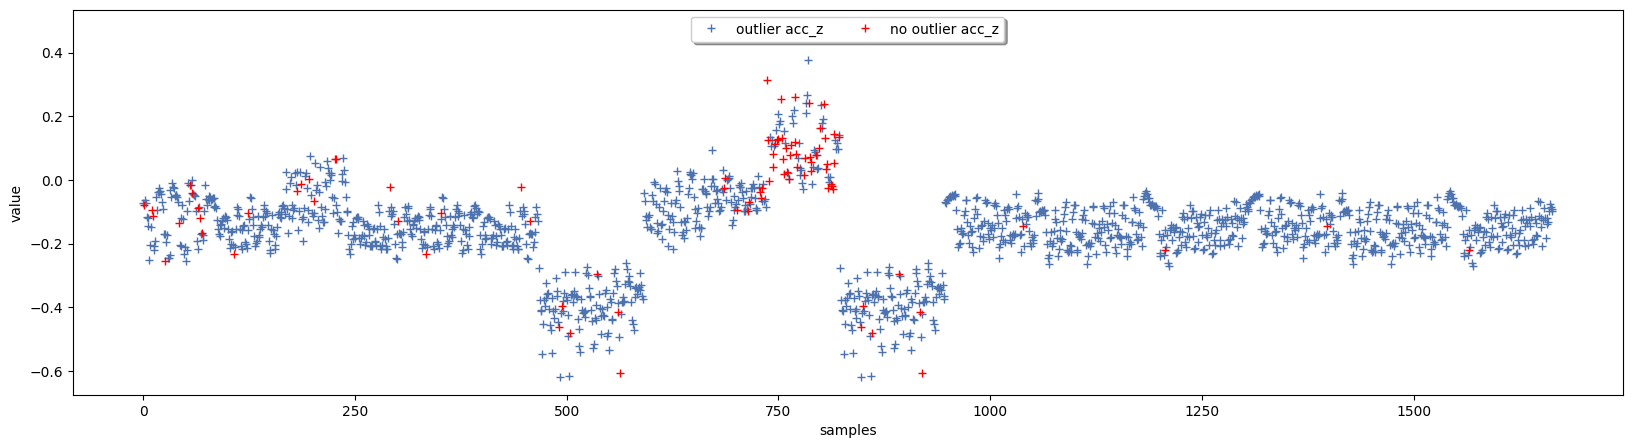

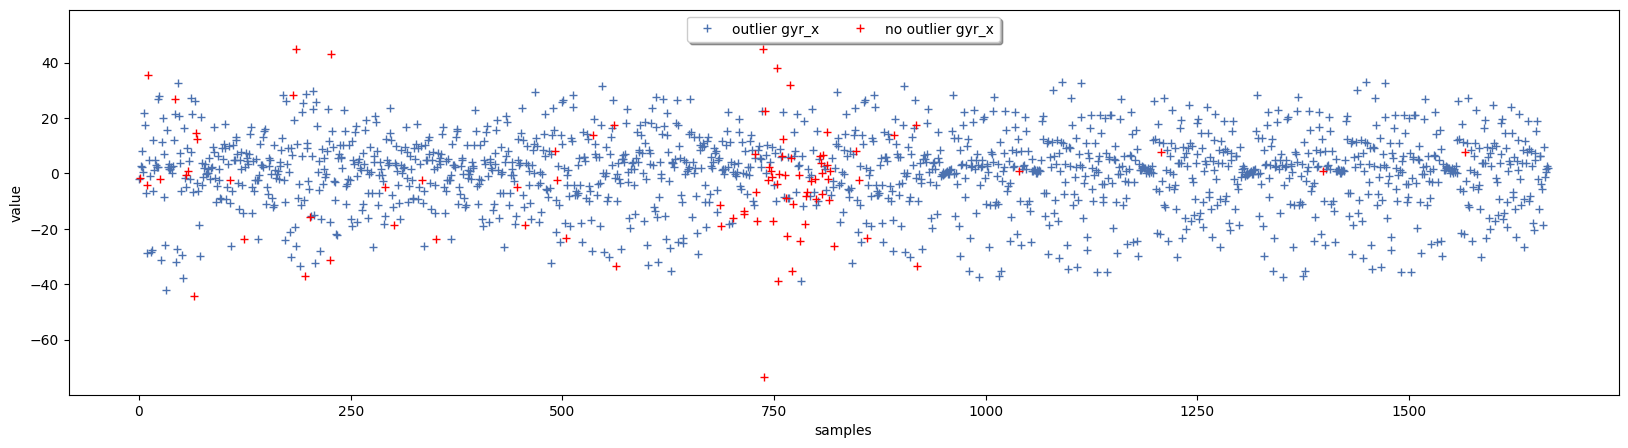

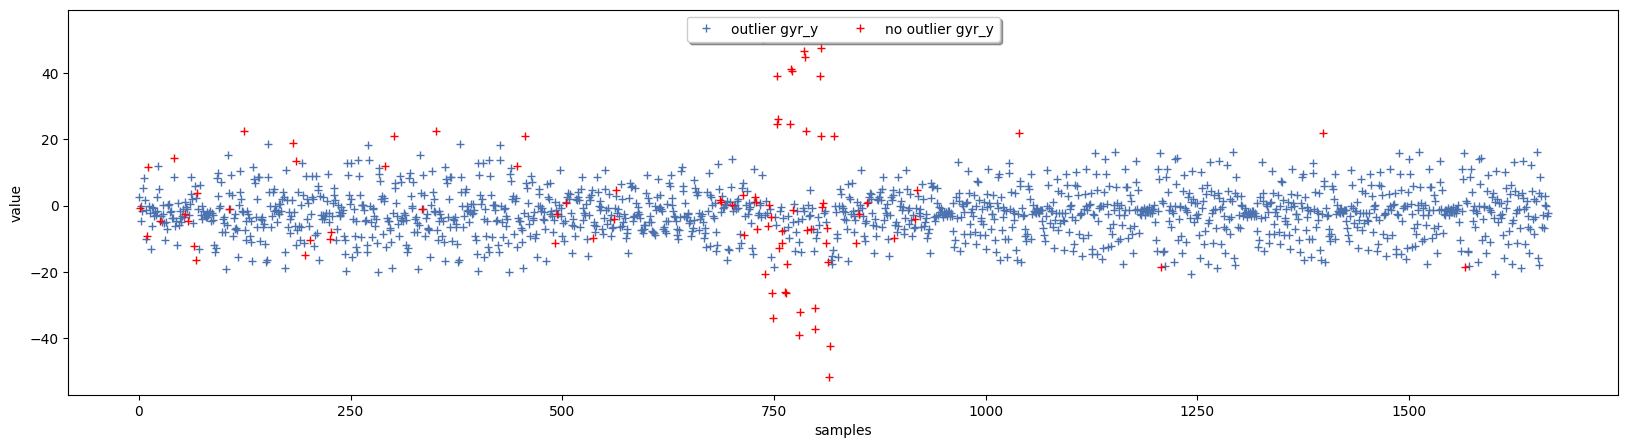

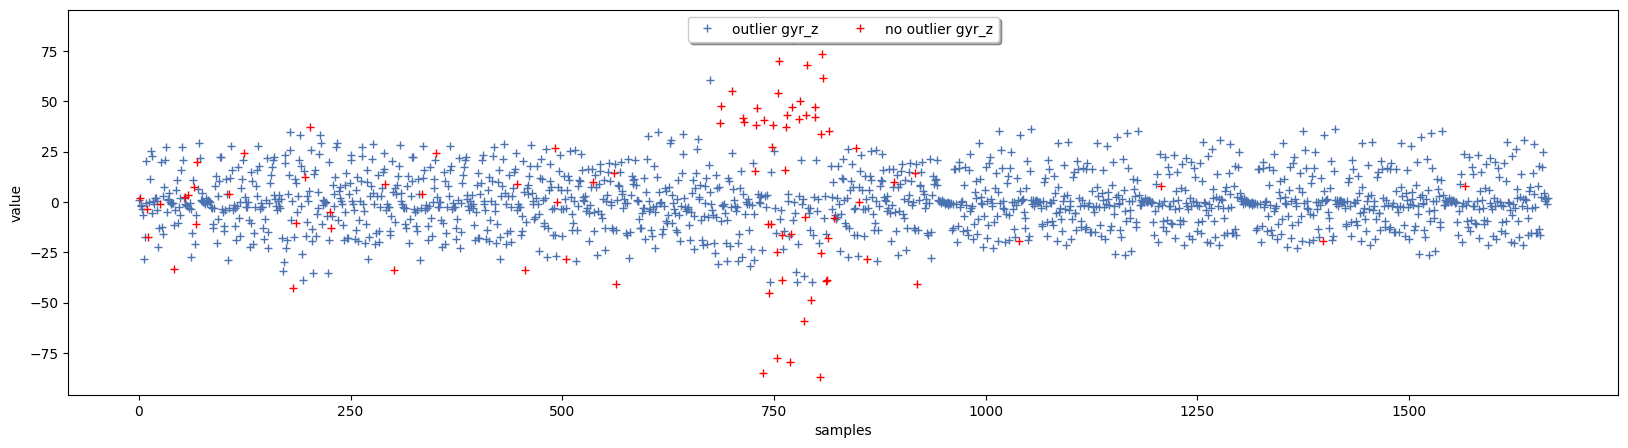

In [19]:
dataset, outliers, X_scores = mark_outliers_lof(df[df['label']==label],outliers_columns)
for col in  outliers_columns:
    plot_binary_outliers(dataset= dataset, col=col , outlier_col= 'outlier_lof',reset_index = True)

# Choose method and deal with outliers

 Test on single column

In [20]:
col= 'gyr_z'
dataset = mark_outliers_chauvenet(df,col = col)
dataset[dataset['gyr_z_outlier']]
dataset.loc[dataset["gyr_z_outlier"],"gyr_z"]=np.nan

In [21]:
dataset[dataset['gyr_z_outlier']==True].head()

acc_x     acc_y     acc_z     gyr_x    gyr_y  \
epoch (ms)                                                                 
2019-01-14 13:57:41.800 -0.137000  1.495500  0.217000   33.9146  14.6462   
2019-01-18 17:22:40.600  0.915500 -0.302500 -0.047500   16.5364  30.1952   
2019-01-18 17:22:40.800  0.846667 -0.645667  0.174333  -49.5610  63.7196   
2019-01-18 17:22:49.600  1.363667  0.030000 -0.001333  -45.7196  -8.1218   
2019-01-18 17:22:49.800  0.707500  0.390500  0.181500 -100.5976 -33.9634   

                         gyr_z participant label category  set  gyr_z_outlier  
epoch (ms)                                                                     
2019-01-14 13:57:41.800    NaN           C   ohp    heavy   35           True  
2019-01-18 17:22:40.600    NaN           A  rest  sitting    4           True  
2019-01-18 17:22:40.800    NaN           A  rest  sitting    4           True  
2019-01-18 17:22:49.600    NaN           A  rest  sitting    4           True  
2019-01-18 17:22:49.800    NaN           A  rest  sitting    4           True

# Create a loop

In [22]:
outliers_removed_df = df.copy()
for col in outliers_columns:
  for label in df['label'].unique():
      dataset = mark_outliers_chauvenet(df[df['label'] == label], col)

      #Replace values marked as outliers by NaN
      dataset.loc[dataset[col + "_outlier"], col] = np.nan

      #Update the column in  the original dataframe
      outliers_removed_df.loc[(outliers_removed_df['label'] == label), col] = dataset[col]

      n_outliers = len(df) - len(outliers_removed_df[col].dropna())
      print(f"Removed {n_outliers} from {col} for {label}")



Removed 0 from acc_x for bench
Removed 2 from acc_x for ohp
Removed 2 from acc_x for squat
Removed 4 from acc_x for dead
Removed 4 from acc_x for row
Removed 4 from acc_x for rest
Removed 5 from acc_y for bench
Removed 11 from acc_y for ohp
Removed 11 from acc_y for squat
Removed 11 from acc_y for dead
Removed 11 from acc_y for row
Removed 11 from acc_y for rest
Removed 3 from acc_z for bench
Removed 9 from acc_z for ohp
Removed 9 from acc_z for squat
Removed 10 from acc_z for dead
Removed 10 from acc_z for row
Removed 10 from acc_z for rest
Removed 2 from gyr_x for bench
Removed 6 from gyr_x for ohp
Removed 7 from gyr_x for squat
Removed 13 from gyr_x for dead
Removed 13 from gyr_x for row
Removed 25 from gyr_x for rest
Removed 14 from gyr_y for bench
Removed 29 from gyr_y for ohp
Removed 38 from gyr_y for squat
Removed 52 from gyr_y for dead
Removed 62 from gyr_y for row
Removed 71 from gyr_y for rest
Removed 13 from gyr_z for bench
Removed 14 from gyr_z for ohp
Removed 26 from gyr_z

In [23]:
outliers_removed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9005 non-null   float64
 1   acc_y        8998 non-null   float64
 2   acc_z        8999 non-null   float64
 3   gyr_x        8984 non-null   float64
 4   gyr_y        8938 non-null   float64
 5   gyr_z        8945 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


# Export new dataframe

In [24]:
outliers_removed_df.to_pickle('/content/drive/MyDrive/FitnessTracker/FitnessTracker/data-science-template-main/data/interim/02_outliers_removed_chauvenets.pkl')